다양한 기계학습 방법을 통해 online 뉴스 인기도 예측력를 극대화
 
최종 평가는 아래 test 데이터를 활용, 최종 예측 평가 지표는 MAE (Mean Absolute Error).

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from graphviz import Source
from IPython.display import Image
from sklearn.tree import export_graphviz

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

## for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

sns.set_style("whitegrid")

In [52]:
# from google.colab import drive
# drive.mount('/content/drive')

In [53]:
path = "onlinenews.csv"
data = pd.read_csv(path, engine='python')
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

X = data.drop([' shares'], axis=1)
y = data[' shares']

- Data has 39644 rows and 60 columns.
- Column names:  [' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global

데이터 6:2:2 Train valid test 구분

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2015010720)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=0.25,
                                                      random_state=2015010720)

# X_valid = scaler.transform(X_valid)

최적 파라미터 조정 없이 학습 및 테스트 진행

In [194]:
clf_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
clf_dt.fit(X_train, y_train)
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)
y_test_pred = clf_dt.predict(X_test)

In [195]:
# Show train & validation accuracies
print('- MSE (Train)      : {:.4}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Validation) : {:.4}'.format(mean_squared_error(y_valid, y_valid_pred)))
print('- MSE (test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))
print('- MAE (Train)      : {:.4}'.format(mean_absolute_error(y_train, y_train_pred)))
print('- MAE (Validation) : {:}'.format(round(mean_absolute_error(y_valid, y_valid_pred))))
print('- MAE (Validation) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred))))

- MSE (Train)      : 0.0
- MSE (Validation) : 2.854e+08
- MSE (test) : 3.916e+08
- MAE (Train)      : 0.0
- MAE (Validation) : 4283
- MAE (Validation) : 4441


---

### EDA

In [73]:
# 기초 통계 및 결측치 확인
print("=== X 요약 통계 ===")
print(X.describe().T)
print("\n=== y 요약 통계 ===")
print(y.describe())
print("\n=== 결측치 개수 ===")
na_X = X.isna().sum()
na_y = pd.Series({'y': y.isna().sum()})
print(pd.concat([na_X, na_y], axis=1, keys=['X','y']))

=== X 요약 통계 ===
                                 count           mean            std      min  \
timedelta                      39644.0     354.530471     214.163767  8.00000   
n_tokens_title                 39644.0      10.398749       2.114037  2.00000   
n_tokens_content               39644.0     546.514731     471.107508  0.00000   
n_unique_tokens                39644.0       0.548216       3.520708  0.00000   
n_non_stop_words               39644.0       0.996469       5.231231  0.00000   
n_non_stop_unique_tokens       39644.0       0.689175       3.264816  0.00000   
num_hrefs                      39644.0      10.883690      11.332017  0.00000   
num_self_hrefs                 39644.0       3.293638       3.855141  0.00000   
num_imgs                       39644.0       4.544143       8.309434  0.00000   
num_videos                     39644.0       1.249874       4.107855  0.00000   
average_token_length           39644.0       4.548239       0.844406  0.00000   
num_keywords

Skewness of y: 33.9639


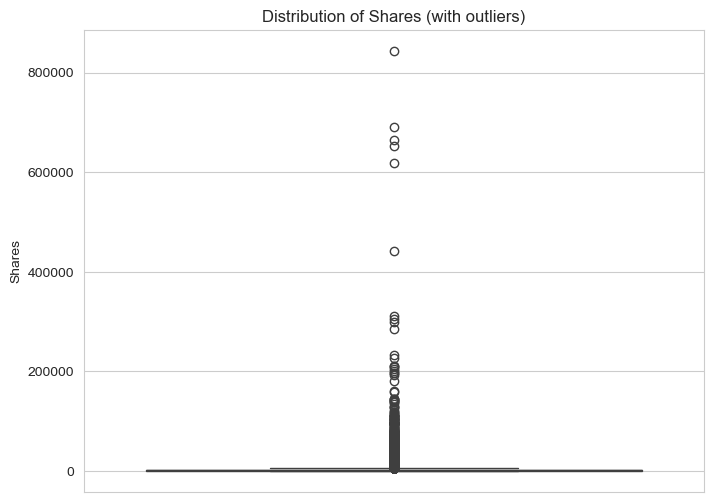

In [74]:
# y 왜도 계산 및 이상치 파악 (전체)
skewness = y.skew()
print(f'Skewness of y: {skewness:.4f}')
      
plt.figure(figsize=(8, 6))
sns.boxplot(y=y)
plt.title('Distribution of Shares (with outliers)')
plt.ylabel('Shares')
plt.show()


=== X feature skewness ===
n_non_stop_words                 198.792445
n_unique_tokens                  198.655116
n_non_stop_unique_tokens         198.443294
kw_max_min                        35.328434
kw_avg_min                        31.306108
self_reference_min_shares         26.264364
self_reference_avg_sharess        17.914093
kw_max_avg                        16.411670
self_reference_max_shares         13.870849
kw_min_max                        10.386372
num_videos                         7.019533
kw_avg_avg                         5.760177
num_self_hrefs                     5.172751
num_hrefs                          4.013495
data_channel_is_lifestyle          3.993019
num_imgs                           3.946596
data_channel_is_socmed             3.758880
weekday_is_saturday                3.637086
weekday_is_sunday                  3.399927
min_positive_polarity              3.040468
n_tokens_content                   2.945422
kw_min_min                         2.374947
is_w

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/3812532366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.values, y=skewness.index, palette='viridis')


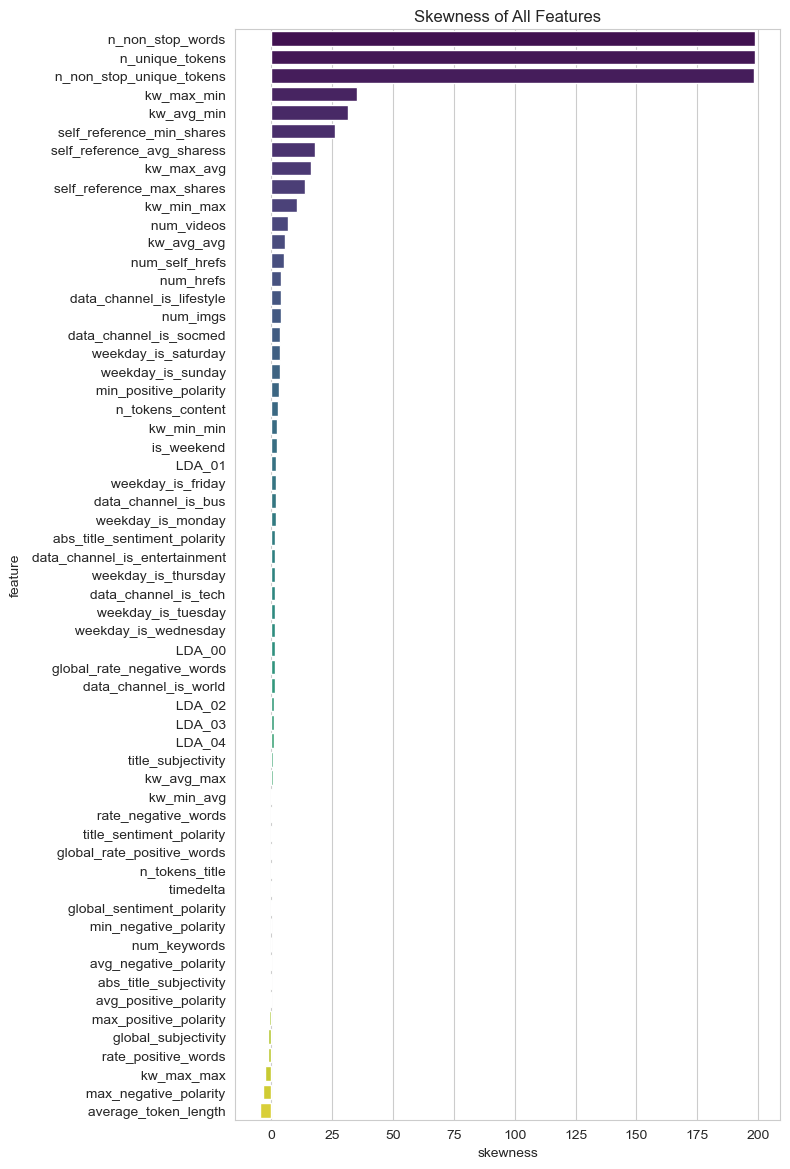

In [75]:
# X 모든 특성의 왜도 계산 및 시각화 (전체)
skewness = X.skew().sort_values(ascending=False)
print("\n=== X feature skewness ===")
print(skewness)
plt.figure(figsize=(8, len(skewness)*0.2))
sns.barplot(x=skewness.values, y=skewness.index, palette='viridis')
plt.title('Skewness of All Features')
plt.xlabel('skewness')
plt.ylabel('feature')
plt.tight_layout()
plt.show()

In [76]:
# 피처와 타켓 사이의 상관관계
corrs = X.apply(lambda col: y.corr(col))
corrs_abs = corrs.abs().sort_values(ascending=False)

corrs_abs.head(10)

kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
LDA_02                        0.059163
self_reference_avg_sharess    0.057789
self_reference_min_shares     0.055958
data_channel_is_world         0.049497
self_reference_max_shares     0.047115
num_hrefs                     0.045404
kw_avg_max                    0.044686
dtype: float64

---

### 피처 엔지니어링

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.ensemble import RandomForestRegressor

# 분할된 각각의 세트에 동일한 피처 엔지니어링 함수 정의
def engineer_features(df):
    df = df.copy()
    # 2-1) 고왜도 컬럼 찾아서 √, ³√ 추가
    skews = df.skew().abs()
    high_skew = skews[skews > 1].index
    for col in high_skew:
        df[f"{col}_sqrt"] = np.sqrt(df[col])
        df[f"{col}_cbrt"] = np.cbrt(df[col])
    # 2-2) 상위 5개 왜도 컬럼 간 곱셈·나눗셈 항 추가
    top5 = list(high_skew.sort_values(ascending=False)[:5])
    for i, a in enumerate(top5):
        for b in top5[i+1:]:
            df[f"{a}_x_{b}"] = df[a] * df[b]
            df[f"{a}_div_{b}"] = np.where(df[b]==0, 0, df[a] / df[b])

            # 클리핑
            low, high = np.percentile(df[f"{a}_div_{b}"], [0.1, 99.9])
            df[f"{a}_div_{b}"] = df[f"{a}_div_{b}"].clip(low, high)

    return df

# 각 세트에 피처 엔지니어링 적용
X_train_fe = engineer_features(X_train)
X_valid_fe = engineer_features(X_valid)
X_test_fe  = engineer_features(X_test)

# 결측치 대체 — 중앙값으로
imputer = SimpleImputer(strategy='median')
X_train_imp = imputer.fit_transform(X_train_fe)
X_valid_imp = imputer.transform(X_valid_fe)
X_test_imp  = imputer.transform(X_test_fe)

# DataFrame 형태로 복원
X_train_df = pd.DataFrame(X_train_imp, columns=X_train_fe.columns, index=X_train.index)
X_valid_df = pd.DataFrame(X_valid_imp, columns=X_train_fe.columns, index=X_valid.index)
X_test_df  = pd.DataFrame(X_test_imp,  columns=X_train_fe.columns, index=X_test.index)


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/3736145416.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{a}_x_{b}"] = df[a] * df[b]

---

### 모델 + 이상치제거, x,y 로그변환, PowerTransformer 조합 분석

In [37]:
from sklearn.base import clone
from tqdm import tqdm
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    AdaBoostRegressor
)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


# 1) 실행할 모델 정의
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=50, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42, verbosity=0),
    'LGBMRegressor': LGBMRegressor(random_state=42),
    'CatBoostRegressor': CatBoostRegressor(random_state=42, verbose=False)
}

# 2) 전처리 조합 리스트 (use_log: x+y 로그 변환, use_pt: PowerTransformer)
combos = [
    {'name': 'raw',                  'remove_pct': None,    'use_iqr': False, 'use_log': False, 'use_pt': False},
    {'name': 'logXY',                'remove_pct': None,    'use_iqr': False, 'use_log': True,  'use_pt': False},
    {'name': 'PT only',              'remove_pct': None,    'use_iqr': False, 'use_log': False, 'use_pt': True},
    {'name': 'logXY + PT',           'remove_pct': None,    'use_iqr': False, 'use_log': True,  'use_pt': True},
    {'name': 'remove 1%',            'remove_pct': 0.99,    'use_iqr': False, 'use_log': False, 'use_pt': False},
    {'name': 'remove 1% + logXY',    'remove_pct': 0.99,    'use_iqr': False, 'use_log': True,  'use_pt': False},
    {'name': 'remove 1% + PT',       'remove_pct': 0.99,    'use_iqr': False, 'use_log': False, 'use_pt': True},
    {'name': 'remove 1% + logXY+PT', 'remove_pct': 0.99,    'use_iqr': False, 'use_log': True,  'use_pt': True},
    {'name': 'remove 0.5%',          'remove_pct': 0.995,   'use_iqr': False, 'use_log': False, 'use_pt': False},
    {'name': 'remove 0.5%+logXY',    'remove_pct': 0.995,   'use_iqr': False, 'use_log': True,  'use_pt': False},
    {'name': 'remove 0.5%+PT',       'remove_pct': 0.995,   'use_iqr': False, 'use_log': False, 'use_pt': True},
    {'name': 'remove0.5%+logXY+PT',  'remove_pct': 0.995,   'use_iqr': False, 'use_log': True,  'use_pt': True},
    {'name': 'IQR',                  'remove_pct': None,    'use_iqr': True,  'use_log': False, 'use_pt': False},
    {'name': 'IQR + logXY',          'remove_pct': None,    'use_iqr': True,  'use_log': True,  'use_pt': False},
    {'name': 'IQR + PT',             'remove_pct': None,    'use_iqr': True,  'use_log': False, 'use_pt': True},
    {'name': 'IQR+logXY+PT',         'remove_pct': None,    'use_iqr': True,  'use_log': True,  'use_pt': True}
]

# 3) 전처리·평가 함수 (이상치제거 → x/y 로그 → PT → 학습 → y 복원 → 평가)
def preprocess_and_eval(model, X_tr, y_tr, X_te, y_te,
                        remove_pct=None, use_iqr=False,
                        use_log=False, use_pt=False):
    Xc, yc = X_tr.copy(), y_tr.copy()

    # 1) 이상치 제거 (y 기준)
    if use_iqr:
        Q1, Q3 = np.percentile(yc, [25, 75])
        mask = (yc >= Q1 - 1.5*(Q3-Q1)) & (yc <= Q3 + 1.5*(Q3-Q1))
        Xc, yc = Xc[mask], yc[mask]
    elif remove_pct is not None:
        thresh = np.percentile(yc, remove_pct*100)
        mask = yc <= thresh
        Xc, yc = Xc[mask], yc[mask]

    # 2) 로그 변환 (x는 skew>1 & non-negative 컬럼만, y 전체)
    if use_log:
        # y 로그
        yc = np.log1p(yc)
        # x selective 로그
        skew_cols = Xc.columns[(Xc.skew().abs() > 1) & (Xc.min() >= 0)]
        Xc[skew_cols] = np.log1p(Xc[skew_cols])
        Xc = np.nan_to_num(Xc, neginf=0, posinf=0)

    # 3) PowerTransformer (x)
    if use_pt:
        pt = PowerTransformer(method='yeo-johnson')
        Xc = pt.fit_transform(Xc)
        Xc = np.nan_to_num(Xc, neginf=0, posinf=0)
        # test에도 동일 변환
        Xte = X_te.copy()
        if use_log:
            Xte[skew_cols] = np.log1p(Xte[skew_cols])
        Xte = pt.transform(np.nan_to_num(Xte, neginf=0, posinf=0))
    else:
        Xte = X_te.copy()
        if use_log:
            Xte[skew_cols] = np.log1p(Xte[skew_cols])
            Xte = np.nan_to_num(Xte, neginf=0, posinf=0)


    # 4) 학습·예측
    clf = clone(model)
    clf.fit(Xc, yc)
    y_pred_log = clf.predict(Xte)

    # 5) y 복원
    if use_log:
        y_pred = np.expm1(y_pred_log)
    else:
        y_pred = y_pred_log

    # 6) 평가
    return mean_squared_error(y_te, y_pred), mean_absolute_error(y_te, y_pred)

# 4) 일괄 실행 및 결과 수집
results = []
for model_name, model in models.items():
    print(f'\n=== {model_name} ===')
    for combo in tqdm(combos, desc=model_name):
        mse, mae = preprocess_and_eval(
            model, 
            # X_train,
            X_train_df,
            y_train, 
            # X_test, 
            X_test_df,
            y_test,
            remove_pct=combo['remove_pct'],
            use_iqr=combo['use_iqr'],
            use_log=combo['use_log'],
            use_pt=combo['use_pt']
        )
        print(f"{combo['name']:20s} → MSE: {mse:.4e}, MAE: {mae:.4f}")
        results.append({
            'model': model_name,
            'combo': combo['name'],
            'MSE': mse,
            'MAE': mae
        })

# 5) DataFrame 변환, MAE 기준 정렬
df = pd.DataFrame(results).sort_values(by='MAE', ascending=True)


=== LinearRegression ===


LinearRegression:   6%|▋         | 1/16 [00:00<00:02,  5.71it/s]

raw                  → MSE: 1.4565e+08, MAE: 3134.6631


LinearRegression:  12%|█▎        | 2/16 [00:00<00:02,  5.27it/s]

logXY                → MSE: 1.5198e+08, MAE: 2364.2544


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
LinearRegression:  19%|█▉        | 3/16 [00:01<00:08,  1.45it/s]

PT only              → MSE: 1.4624e+08, MAE: 3173.1492


LinearRegression:  31%|███▏      | 5/16 [00:02<00:06,  1.71it/s]

logXY + PT           → MSE: 1.4825e+08, MAE: 2343.1265
remove 1%            → MSE: 1.4571e+08, MAE: 2614.2614


LinearRegression:  38%|███▊      | 6/16 [00:03<00:04,  2.17it/s]

remove 1% + logXY    → MSE: 2.4794e+08, MAE: 2442.1258


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
LinearRegression:  44%|████▍     | 7/16 [00:04<00:05,  1.58it/s]

remove 1% + PT       → MSE: 1.4579e+08, MAE: 2612.5535


LinearRegression:  56%|█████▋    | 9/16 [00:05<00:03,  1.82it/s]

remove 1% + logXY+PT → MSE: 1.4874e+08, MAE: 2330.9862
remove 0.5%          → MSE: 1.4526e+08, MAE: 2707.8377


LinearRegression:  62%|██████▎   | 10/16 [00:05<00:02,  2.21it/s]

remove 0.5%+logXY    → MSE: 1.5776e+08, MAE: 2369.5837


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
LinearRegression:  69%|██████▉   | 11/16 [00:06<00:03,  1.61it/s]

remove 0.5%+PT       → MSE: 1.4537e+08, MAE: 2706.2621


LinearRegression:  81%|████████▏ | 13/16 [00:07<00:01,  1.80it/s]

remove0.5%+logXY+PT  → MSE: 1.4854e+08, MAE: 2336.2229
IQR                  → MSE: 1.4983e+08, MAE: 2342.7654


LinearRegression:  88%|████████▊ | 14/16 [00:07<00:00,  2.20it/s]

IQR + logXY          → MSE: 2.0305e+08, MAE: 2409.7474


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
LinearRegression:  94%|█████████▍| 15/16 [00:08<00:00,  1.72it/s]

IQR + PT             → MSE: 1.4983e+08, MAE: 2340.3535


LinearRegression: 100%|██████████| 16/16 [00:09<00:00,  1.67it/s]


IQR+logXY+PT         → MSE: 1.5083e+08, MAE: 2330.1110

=== Ridge ===


Ridge:  12%|█▎        | 2/16 [00:00<00:01, 13.01it/s]

raw                  → MSE: 1.4544e+08, MAE: 3096.7168
logXY                → MSE: 1.4839e+08, MAE: 2346.8662


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


PT only              → MSE: 1.4543e+08, MAE: 3111.4628


Ridge:  38%|███▊      | 6/16 [00:02<00:03,  2.91it/s]

logXY + PT           → MSE: 1.4833e+08, MAE: 2345.5057
remove 1%            → MSE: 1.4571e+08, MAE: 2613.4842
remove 1% + logXY    → MSE: 1.4886e+08, MAE: 2334.9280


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Ridge:  44%|████▍     | 7/16 [00:03<00:04,  2.10it/s]

remove 1% + PT       → MSE: 1.4585e+08, MAE: 2620.8331


Ridge:  62%|██████▎   | 10/16 [00:04<00:02,  2.76it/s]

remove 1% + logXY+PT → MSE: 1.4881e+08, MAE: 2334.0253
remove 0.5%          → MSE: 1.4528e+08, MAE: 2708.2515
remove 0.5%+logXY    → MSE: 1.4866e+08, MAE: 2340.1420


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Ridge:  69%|██████▉   | 11/16 [00:04<00:02,  2.10it/s]

remove 0.5%+PT       → MSE: 1.4540e+08, MAE: 2715.1872


Ridge:  88%|████████▊ | 14/16 [00:05<00:00,  2.74it/s]

remove0.5%+logXY+PT  → MSE: 1.4861e+08, MAE: 2339.0107
IQR                  → MSE: 1.4984e+08, MAE: 2343.3220
IQR + logXY          → MSE: 1.5091e+08, MAE: 2333.8264


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Ridge:  94%|█████████▍| 15/16 [00:06<00:00,  2.16it/s]

IQR + PT             → MSE: 1.4989e+08, MAE: 2347.2373


Ridge: 100%|██████████| 16/16 [00:07<00:00,  2.13it/s]


IQR+logXY+PT         → MSE: 1.5089e+08, MAE: 2333.1444

=== Lasso ===


Lasso:   0%|          | 0/16 [00:00<?, ?it/s]/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.698e+12, tolerance: 3.516e+08
  model = cd_fast.enet_coordinate_descent(
Lasso:  12%|█▎        | 2/16 [00:07<00:44,  3.15s/it]

raw                  → MSE: 1.4540e+08, MAE: 3076.1862
logXY                → MSE: 1.5016e+08, MAE: 2451.7893


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.372e+11, tolerance: 3.516e+08
  model = cd_fast.enet_coordinate_descent(
Lasso:  19%|█▉        | 3/16 [00:15<01:12,  5.54s/it]

PT only              → MSE: 1.4535e+08, MAE: 3094.8434


Lasso:  25%|██▌       | 4/16 [00:16<00:44,  3.71s/it]

logXY + PT           → MSE: 1.5039e+08, MAE: 2463.6460


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+11, tolerance: 3.173e+07
  model = cd_fast.enet_coordinate_descent(
Lasso:  38%|███▊      | 6/16 [00:24<00:33,  3.34s/it]

remove 1%            → MSE: 1.4580e+08, MAE: 2613.8896
remove 1% + logXY    → MSE: 1.5041e+08, MAE: 2440.0053


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.217e+10, tolerance: 3.173e+07
  model = cd_fast.enet_coordinate_descent(
Lasso:  44%|████▍     | 7/16 [00:31<00:41,  4.66s/it]

remove 1% + PT       → MSE: 1.4599e+08, MAE: 2633.6317


Lasso:  50%|█████     | 8/16 [00:32<00:27,  3.46s/it]

remove 1% + logXY+PT → MSE: 1.5059e+08, MAE: 2451.9822


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.334e+11, tolerance: 5.059e+07
  model = cd_fast.enet_coordinate_descent(
Lasso:  62%|██████▎   | 10/16 [00:38<00:17,  2.93s/it]

remove 0.5%          → MSE: 1.4532e+08, MAE: 2706.9781
remove 0.5%+logXY    → MSE: 1.5030e+08, MAE: 2445.3367


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.856e+10, tolerance: 5.059e+07
  model = cd_fast.enet_coordinate_descent(
Lasso:  69%|██████▉   | 11/16 [00:44<00:20,  4.03s/it]

remove 0.5%+PT       → MSE: 1.4551e+08, MAE: 2724.6575


Lasso:  75%|███████▌  | 12/16 [00:45<00:12,  3.08s/it]

remove0.5%+logXY+PT  → MSE: 1.5050e+08, MAE: 2457.2591


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+10, tolerance: 2.586e+06
  model = cd_fast.enet_coordinate_descent(
Lasso:  88%|████████▊ | 14/16 [00:49<00:04,  2.31s/it]

IQR                  → MSE: 1.4989e+08, MAE: 2347.4272
IQR + logXY          → MSE: 1.5170e+08, MAE: 2420.4735


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.491e+08, tolerance: 2.586e+06
  model = cd_fast.enet_coordinate_descent(
Lasso:  94%|█████████▍| 15/16 [00:54<00:02,  2.97s/it]

IQR + PT             → MSE: 1.4998e+08, MAE: 2358.8383


Lasso: 100%|██████████| 16/16 [00:54<00:00,  3.44s/it]


IQR+logXY+PT         → MSE: 1.5177e+08, MAE: 2428.6351

=== KNeighbors ===


KNeighbors:   6%|▋         | 1/16 [00:00<00:06,  2.36it/s]

raw                  → MSE: 1.5835e+08, MAE: 3230.4227


KNeighbors:  12%|█▎        | 2/16 [00:00<00:04,  2.90it/s]

logXY                → MSE: 1.5027e+08, MAE: 2582.6228


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  19%|█▉        | 3/16 [00:01<00:08,  1.52it/s]

PT only              → MSE: 1.5660e+08, MAE: 3152.1144


KNeighbors:  25%|██▌       | 4/16 [00:02<00:09,  1.24it/s]

logXY + PT           → MSE: 1.4841e+08, MAE: 2474.2281


KNeighbors:  31%|███▏      | 5/16 [00:03<00:06,  1.66it/s]

remove 1%            → MSE: 1.4965e+08, MAE: 2838.0853


KNeighbors:  38%|███▊      | 6/16 [00:03<00:04,  2.01it/s]

remove 1% + logXY    → MSE: 1.5024e+08, MAE: 2534.3912


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  44%|████▍     | 7/16 [00:04<00:06,  1.49it/s]

remove 1% + PT       → MSE: 1.4709e+08, MAE: 2707.1811


KNeighbors:  50%|█████     | 8/16 [00:05<00:06,  1.28it/s]

remove 1% + logXY+PT → MSE: 1.4864e+08, MAE: 2435.8264


KNeighbors:  56%|█████▋    | 9/16 [00:05<00:04,  1.64it/s]

remove 0.5%          → MSE: 1.5064e+08, MAE: 2963.5503


KNeighbors:  62%|██████▎   | 10/16 [00:05<00:03,  1.95it/s]

remove 0.5%+logXY    → MSE: 1.5026e+08, MAE: 2557.1855


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  69%|██████▉   | 11/16 [00:06<00:03,  1.48it/s]

remove 0.5%+PT       → MSE: 1.4789e+08, MAE: 2819.3343


KNeighbors:  75%|███████▌  | 12/16 [00:07<00:03,  1.27it/s]

remove0.5%+logXY+PT  → MSE: 1.4853e+08, MAE: 2449.2104


KNeighbors:  81%|████████▏ | 13/16 [00:08<00:01,  1.63it/s]

IQR                  → MSE: 1.5050e+08, MAE: 2450.1820


KNeighbors:  88%|████████▊ | 14/16 [00:08<00:01,  1.97it/s]

IQR + logXY          → MSE: 1.5149e+08, MAE: 2453.4059


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  94%|█████████▍| 15/16 [00:09<00:00,  1.57it/s]

IQR + PT             → MSE: 1.5023e+08, MAE: 2390.8025


KNeighbors: 100%|██████████| 16/16 [00:10<00:00,  1.55it/s]


IQR+logXY+PT         → MSE: 1.5087e+08, MAE: 2384.2387

=== DecisionTree ===


DecisionTree:   6%|▋         | 1/16 [00:02<00:37,  2.48s/it]

raw                  → MSE: 3.7217e+08, MAE: 4496.9555


DecisionTree:  12%|█▎        | 2/16 [00:04<00:29,  2.08s/it]

logXY                → MSE: 2.8166e+08, MAE: 3981.0349


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  19%|█▉        | 3/16 [00:07<00:34,  2.64s/it]

PT only              → MSE: 4.7643e+08, MAE: 4714.6481


DecisionTree:  25%|██▌       | 4/16 [00:10<00:31,  2.62s/it]

logXY + PT           → MSE: 3.4124e+08, MAE: 4096.7465


DecisionTree:  31%|███▏      | 5/16 [00:12<00:26,  2.45s/it]

remove 1%            → MSE: 1.6069e+08, MAE: 3366.7118


DecisionTree:  38%|███▊      | 6/16 [00:14<00:22,  2.26s/it]

remove 1% + logXY    → MSE: 1.5858e+08, MAE: 3288.8057


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  44%|████▍     | 7/16 [00:17<00:22,  2.52s/it]

remove 1% + PT       → MSE: 1.6049e+08, MAE: 3386.5026


DecisionTree:  50%|█████     | 8/16 [00:19<00:20,  2.57s/it]

remove 1% + logXY+PT → MSE: 1.5898e+08, MAE: 3289.5986


DecisionTree:  56%|█████▋    | 9/16 [00:22<00:17,  2.48s/it]

remove 0.5%          → MSE: 1.6894e+08, MAE: 3669.2950


DecisionTree:  62%|██████▎   | 10/16 [00:24<00:13,  2.29s/it]

remove 0.5%+logXY    → MSE: 1.6989e+08, MAE: 3577.0957


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  69%|██████▉   | 11/16 [00:27<00:12,  2.54s/it]

remove 0.5%+PT       → MSE: 1.6895e+08, MAE: 3668.4381


DecisionTree:  75%|███████▌  | 12/16 [00:29<00:10,  2.55s/it]

remove0.5%+logXY+PT  → MSE: 1.7001e+08, MAE: 3559.5414


DecisionTree:  81%|████████▏ | 13/16 [00:31<00:06,  2.29s/it]

IQR                  → MSE: 1.5105e+08, MAE: 2604.5421


DecisionTree:  88%|████████▊ | 14/16 [00:33<00:04,  2.07s/it]

IQR + logXY          → MSE: 1.5075e+08, MAE: 2582.6113


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  94%|█████████▍| 15/16 [00:35<00:02,  2.18s/it]

IQR + PT             → MSE: 1.5070e+08, MAE: 2592.8170


DecisionTree: 100%|██████████| 16/16 [00:37<00:00,  2.36s/it]


IQR+logXY+PT         → MSE: 1.5086e+08, MAE: 2594.9026

=== ExtraTrees ===


ExtraTrees:   6%|▋         | 1/16 [00:18<04:39, 18.61s/it]

raw                  → MSE: 1.5494e+08, MAE: 3431.6075


ExtraTrees:  12%|█▎        | 2/16 [00:35<04:10, 17.89s/it]

logXY                → MSE: 1.4734e+08, MAE: 2358.0889


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  19%|█▉        | 3/16 [00:56<04:06, 18.99s/it]

PT only              → MSE: 1.5574e+08, MAE: 3432.1006


ExtraTrees:  25%|██▌       | 4/16 [01:15<03:46, 18.90s/it]

logXY + PT           → MSE: 1.4761e+08, MAE: 2366.0376


ExtraTrees:  31%|███▏      | 5/16 [01:32<03:22, 18.39s/it]

remove 1%            → MSE: 1.4544e+08, MAE: 2755.9373


ExtraTrees:  38%|███▊      | 6/16 [01:49<02:58, 17.81s/it]

remove 1% + logXY    → MSE: 1.4819e+08, MAE: 2345.0243


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  44%|████▍     | 7/16 [02:08<02:44, 18.24s/it]

remove 1% + PT       → MSE: 1.4530e+08, MAE: 2757.0700


ExtraTrees:  50%|█████     | 8/16 [02:26<02:26, 18.31s/it]

remove 1% + logXY+PT → MSE: 1.4816e+08, MAE: 2348.6129


ExtraTrees:  56%|█████▋    | 9/16 [02:45<02:09, 18.43s/it]

remove 0.5%          → MSE: 1.4557e+08, MAE: 2914.6671


ExtraTrees:  62%|██████▎   | 10/16 [03:02<01:48, 18.06s/it]

remove 0.5%+logXY    → MSE: 1.4807e+08, MAE: 2353.0853


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  69%|██████▉   | 11/16 [03:21<01:31, 18.38s/it]

remove 0.5%+PT       → MSE: 1.4567e+08, MAE: 2898.2558


ExtraTrees:  75%|███████▌  | 12/16 [03:40<01:13, 18.48s/it]

remove0.5%+logXY+PT  → MSE: 1.4776e+08, MAE: 2350.3852


ExtraTrees:  81%|████████▏ | 13/16 [03:54<00:51, 17.26s/it]

IQR                  → MSE: 1.4956e+08, MAE: 2350.1267


ExtraTrees:  88%|████████▊ | 14/16 [04:09<00:32, 16.45s/it]

IQR + logXY          → MSE: 1.5078e+08, MAE: 2331.7341


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  94%|█████████▍| 15/16 [04:25<00:16, 16.33s/it]

IQR + PT             → MSE: 1.4960e+08, MAE: 2355.4678


ExtraTrees: 100%|██████████| 16/16 [04:41<00:00, 17.59s/it]


IQR+logXY+PT         → MSE: 1.5077e+08, MAE: 2331.5816

=== RandomForest ===


RandomForest:   6%|▋         | 1/16 [01:21<20:26, 81.74s/it]

raw                  → MSE: 1.5664e+08, MAE: 3416.3744


RandomForest:  12%|█▎        | 2/16 [02:17<15:32, 66.62s/it]

logXY                → MSE: 1.4794e+08, MAE: 2372.4883


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  19%|█▉        | 3/16 [03:38<15:48, 72.98s/it]

PT only              → MSE: 1.5684e+08, MAE: 3430.6309


RandomForest:  25%|██▌       | 4/16 [04:33<13:13, 66.10s/it]

logXY + PT           → MSE: 1.4788e+08, MAE: 2369.8289


RandomForest:  31%|███▏      | 5/16 [05:41<12:12, 66.62s/it]

remove 1%            → MSE: 1.4613e+08, MAE: 2767.2156


RandomForest:  38%|███▊      | 6/16 [06:34<10:19, 61.94s/it]

remove 1% + logXY    → MSE: 1.4857e+08, MAE: 2350.5291


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  44%|████▍     | 7/16 [07:44<09:41, 64.59s/it]

remove 1% + PT       → MSE: 1.4618e+08, MAE: 2776.9177


RandomForest:  50%|█████     | 8/16 [08:39<08:13, 61.67s/it]

remove 1% + logXY+PT → MSE: 1.4847e+08, MAE: 2348.6959


RandomForest:  56%|█████▋    | 9/16 [09:50<07:31, 64.49s/it]

remove 0.5%          → MSE: 1.4642e+08, MAE: 2928.7047


RandomForest:  62%|██████▎   | 10/16 [10:43<06:06, 61.07s/it]

remove 0.5%+logXY    → MSE: 1.4825e+08, MAE: 2359.4418


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  69%|██████▉   | 11/16 [11:55<05:21, 64.38s/it]

remove 0.5%+PT       → MSE: 1.4680e+08, MAE: 2936.0602


RandomForest:  75%|███████▌  | 12/16 [12:50<04:06, 61.57s/it]

remove0.5%+logXY+PT  → MSE: 1.4819e+08, MAE: 2357.5721


RandomForest:  81%|████████▏ | 13/16 [13:41<02:54, 58.16s/it]

IQR                  → MSE: 1.4962e+08, MAE: 2354.5530


RandomForest:  88%|████████▊ | 14/16 [14:25<01:48, 54.08s/it]

IQR + logXY          → MSE: 1.5082e+08, MAE: 2333.0733


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  94%|█████████▍| 15/16 [15:18<00:53, 53.62s/it]

IQR + PT             → MSE: 1.4962e+08, MAE: 2354.9313


RandomForest: 100%|██████████| 16/16 [16:05<00:00, 60.35s/it]


IQR+logXY+PT         → MSE: 1.5077e+08, MAE: 2331.8279

=== AdaBoost ===


AdaBoost:   6%|▋         | 1/16 [00:07<01:45,  7.07s/it]

raw                  → MSE: 1.1863e+09, MAE: 30999.4476


AdaBoost:  12%|█▎        | 2/16 [00:15<01:46,  7.64s/it]

logXY                → MSE: 1.4656e+08, MAE: 2821.6026


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  19%|█▉        | 3/16 [00:22<01:40,  7.75s/it]

PT only              → MSE: 8.2608e+08, MAE: 26186.7801


AdaBoost:  25%|██▌       | 4/16 [00:31<01:38,  8.21s/it]

logXY + PT           → MSE: 1.4648e+08, MAE: 3011.9377


AdaBoost:  31%|███▏      | 5/16 [00:35<01:10,  6.43s/it]

remove 1%            → MSE: 1.5034e+08, MAE: 4389.1311


AdaBoost:  38%|███▊      | 6/16 [00:42<01:08,  6.86s/it]

remove 1% + logXY    → MSE: 1.4813e+08, MAE: 2469.5948


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  44%|████▍     | 7/16 [00:46<00:53,  5.93s/it]

remove 1% + PT       → MSE: 1.5034e+08, MAE: 4389.1311


AdaBoost:  50%|█████     | 8/16 [00:55<00:54,  6.76s/it]

remove 1% + logXY+PT → MSE: 1.4774e+08, MAE: 2506.8764


AdaBoost:  56%|█████▋    | 9/16 [00:58<00:40,  5.73s/it]

remove 0.5%          → MSE: 1.6157e+08, MAE: 5653.2163


AdaBoost:  62%|██████▎   | 10/16 [01:06<00:38,  6.43s/it]

remove 0.5%+logXY    → MSE: 1.4694e+08, MAE: 2657.1765


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  69%|██████▉   | 11/16 [01:12<00:31,  6.26s/it]

remove 0.5%+PT       → MSE: 1.6885e+08, MAE: 6168.0489


AdaBoost:  75%|███████▌  | 12/16 [01:21<00:28,  7.15s/it]

remove0.5%+logXY+PT  → MSE: 1.4707e+08, MAE: 2618.4494


AdaBoost:  81%|████████▏ | 13/16 [01:24<00:17,  5.81s/it]

IQR                  → MSE: 1.4904e+08, MAE: 2471.7109


AdaBoost:  88%|████████▊ | 14/16 [01:30<00:11,  5.90s/it]

IQR + logXY          → MSE: 1.5198e+08, MAE: 2412.1202


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  94%|█████████▍| 15/16 [01:36<00:05,  5.81s/it]

IQR + PT             → MSE: 1.4875e+08, MAE: 2516.1681


AdaBoost: 100%|██████████| 16/16 [01:44<00:00,  6.51s/it]


IQR+logXY+PT         → MSE: 1.5259e+08, MAE: 2455.1072

=== GradientBoosting ===


GradientBoosting:   6%|▋         | 1/16 [00:31<07:51, 31.40s/it]

raw                  → MSE: 1.4998e+08, MAE: 3032.7144


GradientBoosting:  12%|█▎        | 2/16 [01:02<07:17, 31.26s/it]

logXY                → MSE: 1.4829e+08, MAE: 2336.1206


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  19%|█▉        | 3/16 [01:34<06:52, 31.75s/it]

PT only              → MSE: 1.5027e+08, MAE: 3039.7138


GradientBoosting:  25%|██▌       | 4/16 [02:07<06:23, 31.97s/it]

logXY + PT           → MSE: 1.4828e+08, MAE: 2335.3436


GradientBoosting:  31%|███▏      | 5/16 [02:37<05:46, 31.54s/it]

remove 1%            → MSE: 1.4578e+08, MAE: 2616.3435


GradientBoosting:  38%|███▊      | 6/16 [03:08<05:12, 31.28s/it]

remove 1% + logXY    → MSE: 1.4878e+08, MAE: 2323.8682


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  44%|████▍     | 7/16 [03:40<04:42, 31.44s/it]

remove 1% + PT       → MSE: 1.4576e+08, MAE: 2615.6596


GradientBoosting:  50%|█████     | 8/16 [04:12<04:12, 31.59s/it]

remove 1% + logXY+PT → MSE: 1.4877e+08, MAE: 2323.6638


GradientBoosting:  56%|█████▋    | 9/16 [04:43<03:41, 31.58s/it]

remove 0.5%          → MSE: 1.4565e+08, MAE: 2717.2736


GradientBoosting:  62%|██████▎   | 10/16 [05:15<03:08, 31.46s/it]

remove 0.5%+logXY    → MSE: 1.4862e+08, MAE: 2328.9762


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  69%|██████▉   | 11/16 [05:46<02:37, 31.49s/it]

remove 0.5%+PT       → MSE: 1.4556e+08, MAE: 2715.0204


GradientBoosting:  75%|███████▌  | 12/16 [06:18<02:06, 31.58s/it]

remove0.5%+logXY+PT  → MSE: 1.4860e+08, MAE: 2328.0409


GradientBoosting:  81%|████████▏ | 13/16 [06:45<01:31, 30.33s/it]

IQR                  → MSE: 1.4988e+08, MAE: 2337.2830


GradientBoosting:  88%|████████▊ | 14/16 [07:13<00:59, 29.51s/it]

IQR + logXY          → MSE: 1.5091e+08, MAE: 2326.3781


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  94%|█████████▍| 15/16 [07:42<00:29, 29.27s/it]

IQR + PT             → MSE: 1.4988e+08, MAE: 2337.5685


GradientBoosting: 100%|██████████| 16/16 [08:10<00:00, 30.66s/it]


IQR+logXY+PT         → MSE: 1.5092e+08, MAE: 2326.2405

=== HistGradientBoosting ===


HistGradientBoosting:   6%|▋         | 1/16 [00:00<00:03,  4.59it/s]

raw                  → MSE: 1.4745e+08, MAE: 3072.1867


HistGradientBoosting:  12%|█▎        | 2/16 [00:01<00:09,  1.54it/s]

logXY                → MSE: 1.4798e+08, MAE: 2335.1049


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  19%|█▉        | 3/16 [00:02<00:11,  1.17it/s]

PT only              → MSE: 1.4745e+08, MAE: 3072.1867


HistGradientBoosting:  25%|██▌       | 4/16 [00:04<00:14,  1.22s/it]

logXY + PT           → MSE: 1.4798e+08, MAE: 2335.0945


HistGradientBoosting:  31%|███▏      | 5/16 [00:04<00:11,  1.01s/it]

remove 1%            → MSE: 1.4560e+08, MAE: 2603.1238


HistGradientBoosting:  38%|███▊      | 6/16 [00:05<00:10,  1.06s/it]

remove 1% + logXY    → MSE: 1.4836e+08, MAE: 2315.4463


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  44%|████▍     | 7/16 [00:07<00:10,  1.17s/it]

remove 1% + PT       → MSE: 1.4560e+08, MAE: 2603.1139


HistGradientBoosting:  50%|█████     | 8/16 [00:09<00:11,  1.38s/it]

remove 1% + logXY+PT → MSE: 1.4836e+08, MAE: 2315.4463


HistGradientBoosting:  56%|█████▋    | 9/16 [00:09<00:07,  1.12s/it]

remove 0.5%          → MSE: 1.4544e+08, MAE: 2704.5047


HistGradientBoosting:  62%|██████▎   | 10/16 [00:10<00:06,  1.02s/it]

remove 0.5%+logXY    → MSE: 1.4826e+08, MAE: 2324.6888


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  69%|██████▉   | 11/16 [00:11<00:05,  1.15s/it]

remove 0.5%+PT       → MSE: 1.4548e+08, MAE: 2705.9557


HistGradientBoosting:  75%|███████▌  | 12/16 [00:13<00:05,  1.32s/it]

remove0.5%+logXY+PT  → MSE: 1.4826e+08, MAE: 2324.6888


HistGradientBoosting:  81%|████████▏ | 13/16 [00:14<00:03,  1.13s/it]

IQR                  → MSE: 1.4988e+08, MAE: 2333.3861


HistGradientBoosting:  88%|████████▊ | 14/16 [00:15<00:02,  1.03s/it]

IQR + logXY          → MSE: 1.5088e+08, MAE: 2324.8444


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  94%|█████████▍| 15/16 [00:16<00:01,  1.13s/it]

IQR + PT             → MSE: 1.4988e+08, MAE: 2333.3861


HistGradientBoosting: 100%|██████████| 16/16 [00:18<00:00,  1.13s/it]


IQR+logXY+PT         → MSE: 1.5088e+08, MAE: 2324.8444

=== XGBRegressor ===


XGBRegressor:   6%|▋         | 1/16 [00:00<00:06,  2.27it/s]

raw                  → MSE: 1.7282e+08, MAE: 3493.9216


XGBRegressor:  12%|█▎        | 2/16 [00:00<00:06,  2.07it/s]

logXY                → MSE: 1.4654e+08, MAE: 2380.7249


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  19%|█▉        | 3/16 [00:02<00:10,  1.21it/s]

PT only              → MSE: 1.6940e+08, MAE: 3492.9399


XGBRegressor:  25%|██▌       | 4/16 [00:03<00:12,  1.00s/it]

logXY + PT           → MSE: 1.4787e+08, MAE: 2400.2063


XGBRegressor:  31%|███▏      | 5/16 [00:03<00:08,  1.23it/s]

remove 1%            → MSE: 1.4656e+08, MAE: 2718.3938


XGBRegressor:  38%|███▊      | 6/16 [00:04<00:06,  1.43it/s]

remove 1% + logXY    → MSE: 1.4825e+08, MAE: 2358.2119


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  44%|████▍     | 7/16 [00:05<00:07,  1.16it/s]

remove 1% + PT       → MSE: 1.4652e+08, MAE: 2722.4995


XGBRegressor:  50%|█████     | 8/16 [00:06<00:08,  1.02s/it]

remove 1% + logXY+PT → MSE: 1.4817e+08, MAE: 2371.1636


XGBRegressor:  56%|█████▋    | 9/16 [00:07<00:05,  1.18it/s]

remove 0.5%          → MSE: 1.4702e+08, MAE: 2871.8264


XGBRegressor:  62%|██████▎   | 10/16 [00:07<00:04,  1.33it/s]

remove 0.5%+logXY    → MSE: 1.4764e+08, MAE: 2368.1897


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  69%|██████▉   | 11/16 [00:09<00:04,  1.10it/s]

remove 0.5%+PT       → MSE: 1.4675e+08, MAE: 2875.3972


XGBRegressor:  75%|███████▌  | 12/16 [00:10<00:04,  1.07s/it]

remove0.5%+logXY+PT  → MSE: 1.4675e+08, MAE: 2361.7251


XGBRegressor:  81%|████████▏ | 13/16 [00:11<00:02,  1.13it/s]

IQR                  → MSE: 1.4983e+08, MAE: 2348.5278


XGBRegressor:  88%|████████▊ | 14/16 [00:11<00:01,  1.27it/s]

IQR + logXY          → MSE: 1.5075e+08, MAE: 2336.6787


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  94%|█████████▍| 15/16 [00:12<00:00,  1.10it/s]

IQR + PT             → MSE: 1.4986e+08, MAE: 2354.2749


XGBRegressor: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]


IQR+logXY+PT         → MSE: 1.5069e+08, MAE: 2334.3611

=== LGBMRegressor ===


LGBMRegressor:   0%|          | 0/16 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19822
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 146
[LightGBM] [Info] Start training from score 3448.969436


LGBMRegressor:   6%|▋         | 1/16 [00:00<00:06,  2.42it/s]

raw                  → MSE: 1.5076e+08, MAE: 3146.3257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19822
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 146
[LightGBM] [Info] Start training from score 7.479577


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  12%|█▎        | 2/16 [00:00<00:06,  2.19it/s]

logXY                → MSE: 1.4786e+08, MAE: 2327.8391


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19879
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 146
[LightGBM] [Info] Start training from score 3448.969436


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  19%|█▉        | 3/16 [00:02<00:11,  1.18it/s]

PT only              → MSE: 1.5225e+08, MAE: 3213.0618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19877
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 146
[LightGBM] [Info] Start training from score 7.479577


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  25%|██▌       | 4/16 [00:03<00:12,  1.00s/it]

logXY + PT           → MSE: 1.4766e+08, MAE: 2327.2179
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19819
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 146
[LightGBM] [Info] Start training from score 2692.134704


LGBMRegressor:  31%|███▏      | 5/16 [00:03<00:08,  1.29it/s]

remove 1%            → MSE: 1.4544e+08, MAE: 2600.6444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19819
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 146
[LightGBM] [Info] Start training from score 7.443690


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  38%|███▊      | 6/16 [00:04<00:06,  1.44it/s]

remove 1% + logXY    → MSE: 1.4834e+08, MAE: 2313.9537


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19873
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 146
[LightGBM] [Info] Start training from score 2692.134704


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  44%|████▍     | 7/16 [00:05<00:08,  1.11it/s]

remove 1% + PT       → MSE: 1.4558e+08, MAE: 2599.7432
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19871
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 146
[LightGBM] [Info] Start training from score 7.443690


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  50%|█████     | 8/16 [00:06<00:08,  1.02s/it]

remove 1% + logXY+PT → MSE: 1.4839e+08, MAE: 2317.2805
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19802
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 146
[LightGBM] [Info] Start training from score 2892.703338


LGBMRegressor:  56%|█████▋    | 9/16 [00:07<00:05,  1.23it/s]

remove 0.5%          → MSE: 1.4510e+08, MAE: 2701.2171
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19802
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 146
[LightGBM] [Info] Start training from score 7.460086


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  62%|██████▎   | 10/16 [00:07<00:04,  1.44it/s]

remove 0.5%+logXY    → MSE: 1.4815e+08, MAE: 2322.5937


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19874
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 146
[LightGBM] [Info] Start training from score 2892.703338


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  69%|██████▉   | 11/16 [00:09<00:04,  1.14it/s]

remove 0.5%+PT       → MSE: 1.4508e+08, MAE: 2705.3668
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19871
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 146
[LightGBM] [Info] Start training from score 7.460086


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  75%|███████▌  | 12/16 [00:10<00:04,  1.03s/it]

remove0.5%+logXY+PT  → MSE: 1.4824e+08, MAE: 2322.1459
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19735
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 146
[LightGBM] [Info] Start training from score 1677.892864


LGBMRegressor:  81%|████████▏ | 13/16 [00:10<00:02,  1.20it/s]

IQR                  → MSE: 1.4977e+08, MAE: 2329.1342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19735
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 146
[LightGBM] [Info] Start training from score 7.233340


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  88%|████████▊ | 14/16 [00:11<00:01,  1.37it/s]

IQR + logXY          → MSE: 1.5082e+08, MAE: 2319.1406


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19808
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 146
[LightGBM] [Info] Start training from score 1677.892864


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  94%|█████████▍| 15/16 [00:12<00:00,  1.13it/s]

IQR + PT             → MSE: 1.4975e+08, MAE: 2327.7351
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19809
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 146
[LightGBM] [Info] Start training from score 7.233340


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor: 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]


IQR+logXY+PT         → MSE: 1.5079e+08, MAE: 2317.9443

=== CatBoostRegressor ===


CatBoostRegressor:   6%|▋         | 1/16 [00:02<00:44,  3.00s/it]

raw                  → MSE: 1.5301e+08, MAE: 3120.3843


CatBoostRegressor:  12%|█▎        | 2/16 [00:06<00:42,  3.03s/it]

logXY                → MSE: 1.4753e+08, MAE: 2322.5148


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  19%|█▉        | 3/16 [00:09<00:42,  3.27s/it]

PT only              → MSE: 1.5287e+08, MAE: 3141.0639


CatBoostRegressor:  25%|██▌       | 4/16 [00:13<00:41,  3.47s/it]

logXY + PT           → MSE: 1.4766e+08, MAE: 2321.1683


CatBoostRegressor:  31%|███▏      | 5/16 [00:16<00:35,  3.22s/it]

remove 1%            → MSE: 1.4493e+08, MAE: 2588.0308


CatBoostRegressor:  38%|███▊      | 6/16 [00:19<00:31,  3.13s/it]

remove 1% + logXY    → MSE: 1.4811e+08, MAE: 2307.6444


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  44%|████▍     | 7/16 [00:22<00:29,  3.27s/it]

remove 1% + PT       → MSE: 1.4496e+08, MAE: 2590.7803


CatBoostRegressor:  50%|█████     | 8/16 [00:26<00:27,  3.47s/it]

remove 1% + logXY+PT → MSE: 1.4824e+08, MAE: 2308.0873


CatBoostRegressor:  56%|█████▋    | 9/16 [00:29<00:23,  3.33s/it]

remove 0.5%          → MSE: 1.4513e+08, MAE: 2695.0338


CatBoostRegressor:  62%|██████▎   | 10/16 [00:32<00:19,  3.23s/it]

remove 0.5%+logXY    → MSE: 1.4794e+08, MAE: 2315.5581


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  69%|██████▉   | 11/16 [00:36<00:17,  3.41s/it]

remove 0.5%+PT       → MSE: 1.4529e+08, MAE: 2703.4115


CatBoostRegressor:  75%|███████▌  | 12/16 [00:40<00:14,  3.54s/it]

remove0.5%+logXY+PT  → MSE: 1.4801e+08, MAE: 2314.5324


CatBoostRegressor:  81%|████████▏ | 13/16 [00:43<00:10,  3.35s/it]

IQR                  → MSE: 1.4980e+08, MAE: 2324.4060


CatBoostRegressor:  88%|████████▊ | 14/16 [00:46<00:06,  3.25s/it]

IQR + logXY          → MSE: 1.5069e+08, MAE: 2312.6123


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  94%|█████████▍| 15/16 [00:49<00:03,  3.33s/it]

IQR + PT             → MSE: 1.4973e+08, MAE: 2322.7797


CatBoostRegressor: 100%|██████████| 16/16 [00:53<00:00,  3.33s/it]

IQR+logXY+PT         → MSE: 1.5072e+08, MAE: 2312.4931


In [56]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df

,model,combo,MSE,MAE
197,CatBoostRegressor,remove 1% + logXY,1.481126e+08,2307.644353
199,CatBoostRegressor,remove 1% + logXY+PT,1.482375e+08,2308.087323
207,CatBoostRegressor,IQR+logXY+PT,1.507155e+08,2312.493114
205,CatBoostRegressor,IQR + logXY,1.506911e+08,2312.612308
181,LGBMRegressor,remove 1% + logXY,1.483416e+08,2313.953653
203,CatBoostRegressor,remove0.5%+logXY+PT,1.480101e+08,2314.532434
151,HistGradientBoosting,remove 1% + logXY+PT,1.483582e+08,2315.446290
149,HistGradientBoosting,remove 1% + logXY,1.483582e+08,2315.446290
201,CatBoostRegressor,remove 0.5%+logXY,1.479350e+08,2315.558052
183,LGBMRegressor,remove 1% + logXY+PT,1.483914e+08,2317.280544


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/2112299171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


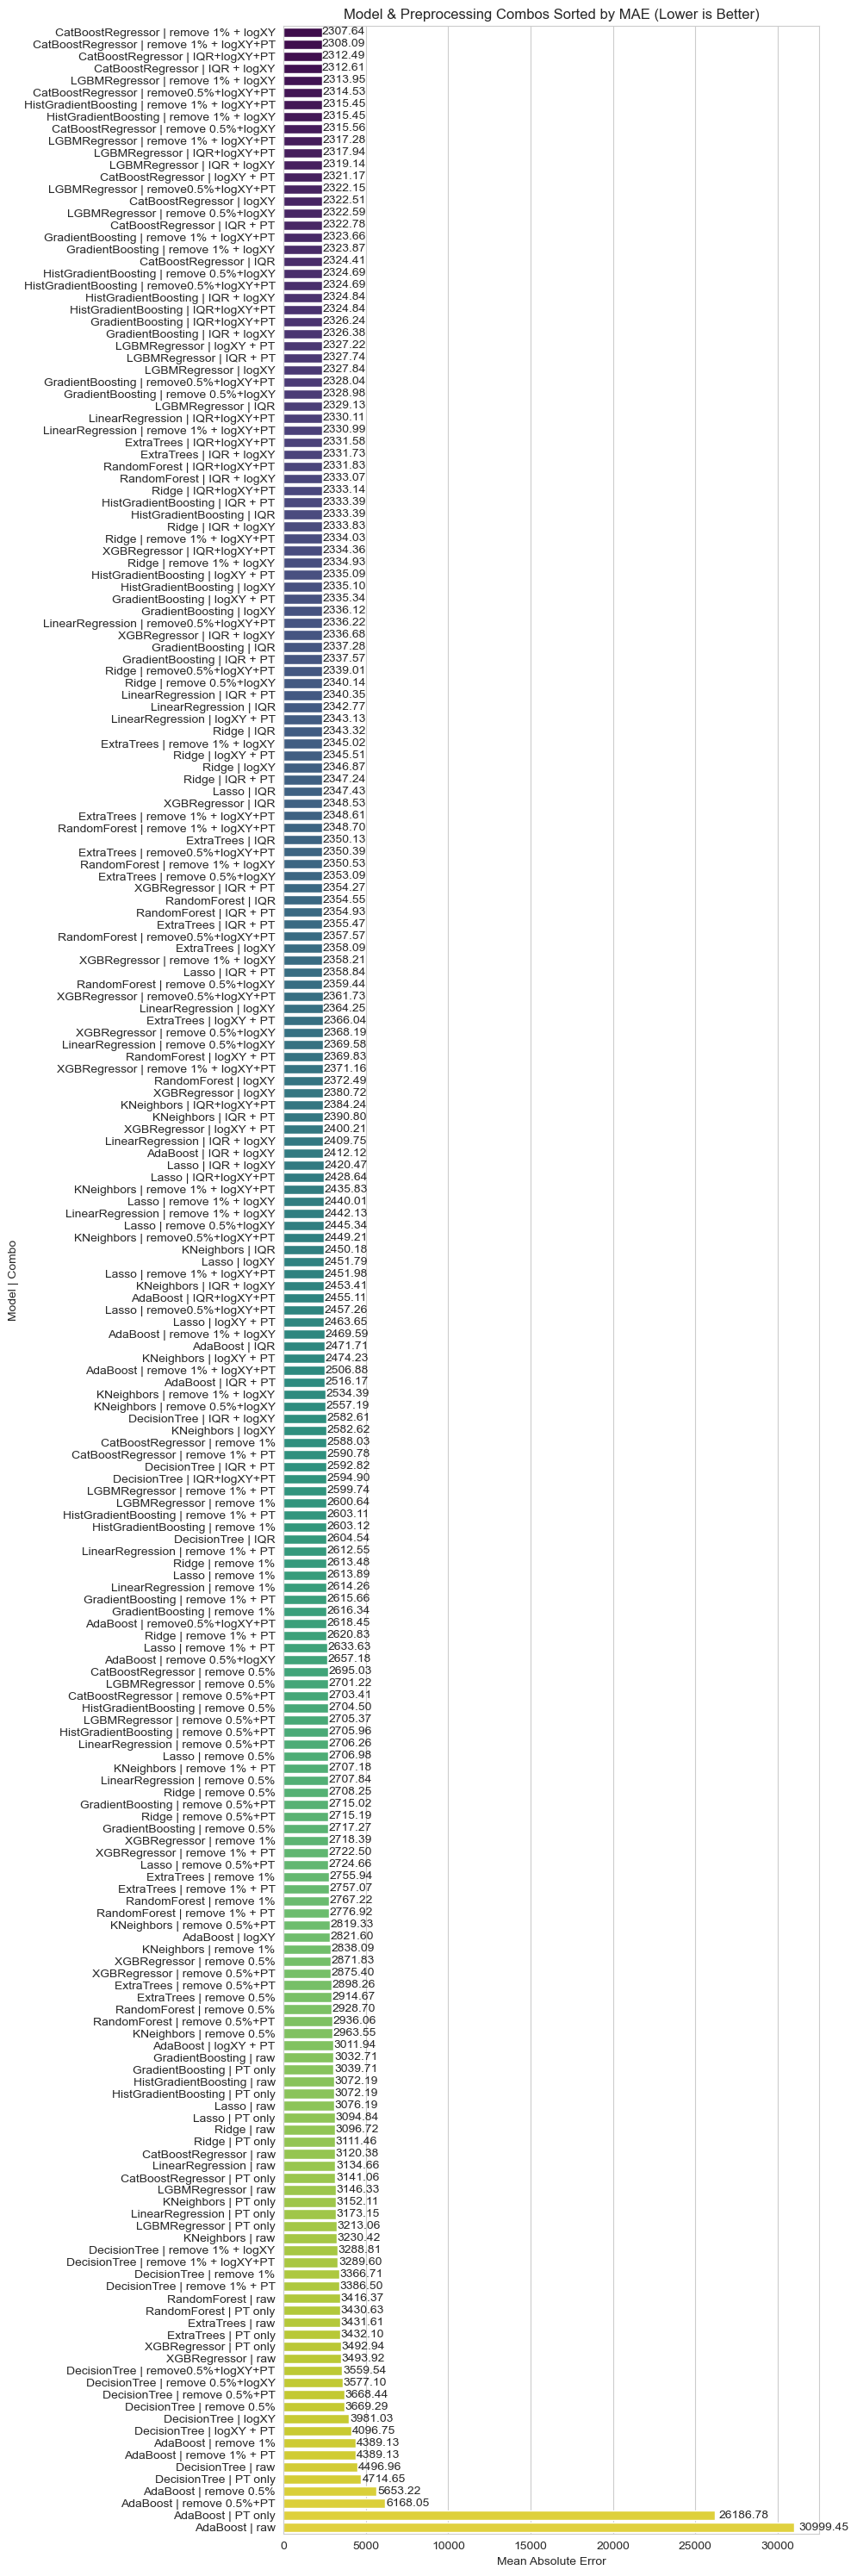

In [39]:
# 6) 시각화
plt.figure(figsize=(10, 30))
ax = sns.barplot(
    x='MAE',
    y=df['model'] + ' | ' + df['combo'],
    data=df,
    palette='viridis'
)
plt.title('Model & Preprocessing Combos Sorted by MAE (Lower is Better)')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Model | Combo')

for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width + 0.01 * width, y, f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()

상위 10개 결과를 보면 PT는 효과적이지 못함.

197	CatBoostRegressor	remove 1% + logXY	1.482069e+08	2310.604051  
181	LGBMRegressor	remove 1% + logXY	1.482740e+08	2310.955857  
205	CatBoostRegressor	IQR + logXY	1.507058e+08	2312.644684  
199	CatBoostRegressor	remove 1% + logXY+PT	1.482037e+08	2312.666845  
207	CatBoostRegressor	IQR+logXY+PT	1.507446e+08	2312.967935  
183	LGBMRegressor	remove 1% + logXY+PT	1.482051e+08	2314.831134  
189	LGBMRegressor	IQR + logXY	1.507363e+08	2318.363901  
191	LGBMRegressor	IQR+logXY+PT	1.507647e+08	2318.894286  
201	CatBoostRegressor	remove 0.5%+logXY	1.480473e+08	2318.997003  
187	LGBMRegressor	remove0.5%+logXY+PT	1.481278e+08	2319.078350  
185	LGBMRegressor	remove 0.5%+logXY	1.480498e+08	2319.392478  
151	HistGradientBoosting	remove 1% + logXY+PT	1.485917e+08	2320.001678  
149	HistGradientBoosting	remove 1% + logXY	1.485917e+08	2320.001678  
203	CatBoostRegressor	remove0.5%+logXY+PT	1.480934e+08	2321.903168  
204	CatBoostRegressor	IQR	1.497469e+08	2322.446722  
195	CatBoostRegressor	logXY + PT	1.477143e+08	2323.780359  
206	CatBoostRegressor	IQR + PT	1.497796e+08	2324.049536  
193	CatBoostRegressor	logXY	1.476645e+08	2324.221921  
133	GradientBoosting	remove 1% + logXY	1.487699e+08	2324.320708  
157	HistGradientBoosting	IQR + logXY	1.508897e+08	2324.432263  

---

### 전처리

In [59]:
# 전처리 함수: remove 1% + selective log1p on X
def preprocess(X, y, remove_pct=0.99):
    # 1) y 기준 이상치 제거
    thresh = np.percentile(y, remove_pct*100)
    mask = y <= thresh
    Xf = X.loc[mask].copy()
    yf = y.loc[mask].copy()
    # 2) y 로그 변환
    yf = np.log1p(yf)
    # 3) X selective log: skew>1 & non-negative
    skew_cols = Xf.columns[(Xf.skew().abs() > 1) & (Xf.min() >= 0)]
    Xf[skew_cols] = np.log1p(Xf[skew_cols])
    return Xf, yf, skew_cols

# train+valid 합치고 전처리
X_tv = pd.concat([X_train, X_valid], axis=0)
y_tv = pd.concat([y_train, y_valid], axis=0)
X_tv_proc, y_tv_proc, skew_cols = preprocess(X_tv, y_tv, remove_pct=0.99)

# test도 동일 전처리
X_test_proc = X_test.copy()
X_test_proc[skew_cols] = np.log1p(X_test_proc[skew_cols])

### 하이퍼파라미터 튜닝

In [60]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
import optuna
from sklearn.pipeline import Pipeline

# PredefinedSplit 세팅 (전처리 후 인덱스로 train/valid 구분)
# 전처리로 남은 X_tv_proc.index가 원래 train인지 valid인지 판별
is_train = X_tv_proc.index.isin(X_train.index)  # True 면 train, False 면 valid
test_fold = np.where(is_train, -1, 0)
ps = PredefinedSplit(test_fold=test_fold)

# Optuna용 objective factory
def make_objective(model_name):
    def objective(trial):
        # PT 적용 여부도 하이퍼파라미터로 제안
        use_pt = trial.suggest_categorical('use_pt', [False, True])
        pt = PowerTransformer(method='yeo-johnson')
        
        # 하이퍼파라미터
        if model_name == 'Cat':
            params = {
                'depth': trial.suggest_int('depth', 4, 10),
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
                'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 9, step=2),
                'iterations': trial.suggest_categorical('iterations', [200,500,800]),
                'border_count': trial.suggest_categorical('border_count', [32,64,128]),
                'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
                'random_state': 42, 'verbose': False
            }
            model = CatBoostRegressor(**params)
        elif model_name == 'LGBM':
            params = {
                'n_estimators': trial.suggest_categorical('n_estimators', [100,200,300]),
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
                'num_leaves': trial.suggest_categorical('num_leaves', [31,63,127]),
                'max_depth': trial.suggest_categorical('max_depth', [-1,5,10,15]),
                'min_child_samples': trial.suggest_categorical('min_child_samples', [5,10,20]),
                'subsample': trial.suggest_categorical('subsample', [0.6,0.8,1.0]),
                'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.6,0.8,1.0]),
                'random_state': 42
            }
            model = LGBMRegressor(**params)
        elif model_name == 'HistGB':
            params = {
                'max_iter': trial.suggest_categorical('max_iter', [100,200,300]),
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
                'max_depth': trial.suggest_categorical('max_depth', [None,5,10]),
                'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [1,3,5]),
                'l2_regularization': trial.suggest_categorical('l2_regularization', [0.0,0.1,0.5])
            }
            model = HistGradientBoostingRegressor(**params, random_state=42)
        else:  # GB
            params = {
                'n_estimators': trial.suggest_categorical('n_estimators', [100,200,300]),
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
                'max_depth': trial.suggest_categorical('max_depth', [3,5,7]),
                'min_samples_split': trial.suggest_categorical('min_samples_split', [2,5,10]),
                'subsample': trial.suggest_categorical('subsample', [0.6,0.8,1.0]),
                'random_state': 42
            }
            model = GradientBoostingRegressor(**params)

        # PredefinedSplit CV
        preds = np.zeros(len(y_tv_proc))
        for train_idx, valid_idx in ps.split():
            X_tr, y_tr = X_tv_proc.iloc[train_idx], y_tv_proc.iloc[train_idx]
            X_va, y_va = X_tv_proc.iloc[valid_idx], y_tv_proc.iloc[valid_idx]

            if model_name == 'Cat':
                model.fit(X_tr, y_tr,
                        eval_set=(X_va, y_va),
                        use_best_model=True)
            elif model_name == 'LGBM':
                model.fit(X_tr, y_tr,
                        eval_set=[(X_va, y_va)])
            else:
                model.fit(X_tr, y_tr)

            preds[valid_idx] = model.predict(X_va)

        return mean_absolute_error(y_tv_proc, preds)
    return objective

# 모델별 Optuna 최적화 + 재학습
best_estimators = {}
studies = {} 

for name in tqdm(['Cat','LGBM','HistGB','GB'], desc="Optuna tuning"):
    study = optuna.create_study(
        direction='minimize',
        sampler=optuna.samplers.TPESampler(),
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
    )
    study.optimize(make_objective(name), n_trials=50, show_progress_bar=True)
    studies[name] = study 
    print(f"{name} best params:", study.best_params)
    # ── 재학습 파트 ──
    # 1) best_params 복사
    params = study.best_params.copy()
    # 2) use_pt만 꺼내고 모델 파라미터에서 제거
    use_pt = params.pop('use_pt')
    # 3) 각 모델 인스턴스 생성
    if name == 'Cat':
        base = CatBoostRegressor(random_state=42, verbose=False, **params)
    elif name == 'LGBM':
        base = LGBMRegressor(random_state=42, **params)
    elif name == 'HistGB':
        base = HistGradientBoostingRegressor(random_state=42, **params)
    else:
        base = GradientBoostingRegressor(random_state=42, **params)

    # 4) use_pt 여부에 따라 Pipeline 구성
    if use_pt:
        pipe = Pipeline([
            ('pt', PowerTransformer(method='yeo-johnson')),
            ('model', base),
        ])
    else:
        pipe = Pipeline([('model', base)])

    # 5) TV 전체 데이터로 재학습
    pipe.fit(X_tv_proc, y_tv_proc)

    best_estimators[name] = pipe

# Test MAE/MSE 비교
results = []
for name, mdl in best_estimators.items():
    y_pred = np.expm1(mdl.predict(X_test_proc))
    results.append({
        'model': name,
        'test_MAE': mean_absolute_error(y_test, y_pred),
        'test_MSE': mean_squared_error(y_test, y_pred)
    })
    
df_test = pd.DataFrame(results).set_index('model').sort_values('test_MAE')

Optuna tuning:   0%|          | 0/4 [00:00<?, ?it/s][I 2025-05-06 17:30:30,884] A new study created in memory with name: no-name-ebe89a72-b755-4584-8e88-72569b4ca059


  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
Optuna tuning:   0%|          | 0/4 [00:02<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

[I 2025-05-06 17:30:33,212] Trial 0 finished with value: 5.728936065020455 and parameters: {'use_pt': False, 'depth': 8, 'learning_rate': 0.00751795650742684, 'l2_leaf_reg': 1, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.5555248491161983}. Best is trial 0 with value: 5.728936065020455.


Optuna tuning:   0%|          | 0/4 [00:02<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:33,688] Trial 1 finished with value: 5.734791776760751 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.006713202533406256, 'l2_leaf_reg': 7, 'iterations': 200, 'border_count': 64, 'bagging_temperature': 0.6126297637236865}. Best is trial 0 with value: 5.728936065020455.


Optuna tuning:   0%|          | 0/4 [00:04<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:34,960] Trial 2 finished with value: 5.727412506141354 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.057710904987731765, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 32, 'bagging_temperature': 0.7970613118980832}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:04<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:35,401] Trial 3 finished with value: 5.735086633875534 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.006776095361497945, 'l2_leaf_reg': 9, 'iterations': 200, 'border_count': 128, 'bagging_temperature': 0.2725860704973123}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:05<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:36,637] Trial 4 finished with value: 5.729340702177091 and parameters: {'use_pt': True, 'depth': 9, 'learning_rate': 0.010043782344132056, 'l2_leaf_reg': 5, 'iterations': 500, 'border_count': 32, 'bagging_temperature': 0.7267695275656794}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:06<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:37,428] Trial 5 finished with value: 5.732191793441747 and parameters: {'use_pt': True, 'depth': 9, 'learning_rate': 0.010637264039983555, 'l2_leaf_reg': 7, 'iterations': 200, 'border_count': 128, 'bagging_temperature': 0.7446888105817316}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:07<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:38,281] Trial 6 finished with value: 5.727808607151027 and parameters: {'use_pt': True, 'depth': 4, 'learning_rate': 0.04053486019104478, 'l2_leaf_reg': 3, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.7677686924441757}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:09<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:40,194] Trial 7 finished with value: 5.730713935077154 and parameters: {'use_pt': False, 'depth': 10, 'learning_rate': 0.005978576612322885, 'l2_leaf_reg': 9, 'iterations': 500, 'border_count': 32, 'bagging_temperature': 0.9028350844254998}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:09<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:40,635] Trial 8 finished with value: 5.727981722522737 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.058885305363824636, 'l2_leaf_reg': 7, 'iterations': 200, 'border_count': 64, 'bagging_temperature': 0.05762042806065115}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:10<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:41,608] Trial 9 finished with value: 5.727642175638145 and parameters: {'use_pt': False, 'depth': 7, 'learning_rate': 0.030399948382250744, 'l2_leaf_reg': 5, 'iterations': 500, 'border_count': 128, 'bagging_temperature': 0.5489107412596538}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:11<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:42,572] Trial 10 finished with value: 5.7278666706274475 and parameters: {'use_pt': False, 'depth': 5, 'learning_rate': 0.0942739371189416, 'l2_leaf_reg': 1, 'iterations': 800, 'border_count': 32, 'bagging_temperature': 0.9580442450445552}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:12<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:43,291] Trial 11 finished with value: 5.72844179409016 and parameters: {'use_pt': False, 'depth': 6, 'learning_rate': 0.024021389595043394, 'l2_leaf_reg': 5, 'iterations': 500, 'border_count': 32, 'bagging_temperature': 0.3928707865531783}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:13<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:44,492] Trial 12 finished with value: 5.727435148316951 and parameters: {'use_pt': False, 'depth': 6, 'learning_rate': 0.02842230293365711, 'l2_leaf_reg': 3, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.43048245402374286}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:14<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:45,519] Trial 13 finished with value: 5.727850205605506 and parameters: {'use_pt': False, 'depth': 6, 'learning_rate': 0.057452061424542705, 'l2_leaf_reg': 3, 'iterations': 800, 'border_count': 32, 'bagging_temperature': 0.4048593653997118}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:15<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:46,700] Trial 14 finished with value: 5.727994030052722 and parameters: {'use_pt': True, 'depth': 6, 'learning_rate': 0.01782827821027579, 'l2_leaf_reg': 3, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.15609795600570908}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:16<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:47,534] Trial 15 finished with value: 5.727585086237338 and parameters: {'use_pt': False, 'depth': 4, 'learning_rate': 0.09942450136498515, 'l2_leaf_reg': 3, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.4006493145904715}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:17<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:48,462] Trial 16 finished with value: 5.728482599723976 and parameters: {'use_pt': True, 'depth': 5, 'learning_rate': 0.01718681174286116, 'l2_leaf_reg': 1, 'iterations': 800, 'border_count': 32, 'bagging_temperature': 0.8562703899834316}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:18<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:49,398] Trial 17 finished with value: 5.727697351065393 and parameters: {'use_pt': False, 'depth': 5, 'learning_rate': 0.045883977043644955, 'l2_leaf_reg': 3, 'iterations': 800, 'border_count': 32, 'bagging_temperature': 0.6409187119234532}. Best is trial 2 with value: 5.727412506141354.


Optuna tuning:   0%|          | 0/4 [00:20<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:51,002] Trial 18 finished with value: 5.726891082167848 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.02982661795224618, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.3086082159517838}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:21<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:52,417] Trial 19 finished with value: 5.727321644061749 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.06551771195715972, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.22357263060900523}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:23<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:54,697] Trial 20 finished with value: 5.727565580138517 and parameters: {'use_pt': True, 'depth': 9, 'learning_rate': 0.07504814593250793, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.2518772911321065}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:25<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:56,116] Trial 21 finished with value: 5.72712199927338 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.03602222185353361, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.27622632790215157}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:26<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:57,530] Trial 22 finished with value: 5.727108101361357 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.03747665256565304, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.277479647209702}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:28<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:30:59,208] Trial 23 finished with value: 5.72725711771697 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.0362193495054561, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.012318844656551031}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:29<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:00,622] Trial 24 finished with value: 5.727603119195534 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.018612535952225243, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.3157493399886462}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:31<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:02,026] Trial 25 finished with value: 5.72726078728971 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.03246147212653772, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.10679009942957784}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:32<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:03,738] Trial 26 finished with value: 5.727389993375961 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.044507946614910414, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.19105056480245897}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:34<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:04,948] Trial 27 finished with value: 5.727645696458763 and parameters: {'use_pt': True, 'depth': 6, 'learning_rate': 0.023738680408743957, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.31679755744593024}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:35<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:05,960] Trial 28 finished with value: 5.73085207035076 and parameters: {'use_pt': True, 'depth': 10, 'learning_rate': 0.014092125721823636, 'l2_leaf_reg': 7, 'iterations': 200, 'border_count': 64, 'bagging_temperature': 0.4615240252532896}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:36<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:07,322] Trial 29 finished with value: 5.727669195599209 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.02559656577770145, 'l2_leaf_reg': 9, 'iterations': 500, 'border_count': 128, 'bagging_temperature': 0.33182813942457984}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:38<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:08,938] Trial 30 finished with value: 5.727242768042648 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.048803180362425286, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.12944123540105068}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:39<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:10,559] Trial 31 finished with value: 5.727190895540991 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.04647946170976898, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.15067936699088327}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:41<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:12,140] Trial 32 finished with value: 5.727018744062095 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.034670494346602576, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.20539834517995995}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:42<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:13,451] Trial 33 finished with value: 5.727300890980067 and parameters: {'use_pt': True, 'depth': 6, 'learning_rate': 0.036167045211657964, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.5001384746310212}. Best is trial 18 with value: 5.726891082167848.


Optuna tuning:   0%|          | 0/4 [00:44<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:15,714] Trial 34 finished with value: 5.726709211077974 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.034259002647376566, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.2621751426801745}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [00:45<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:16,338] Trial 35 finished with value: 5.729802424766298 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.02210778498351117, 'l2_leaf_reg': 7, 'iterations': 200, 'border_count': 128, 'bagging_temperature': 0.35882211388187313}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [00:48<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:19,360] Trial 36 finished with value: 5.7271531252925945 and parameters: {'use_pt': True, 'depth': 9, 'learning_rate': 0.027443048627181315, 'l2_leaf_reg': 9, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.2122898534368488}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [00:51<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:22,491] Trial 37 finished with value: 5.727225069325006 and parameters: {'use_pt': True, 'depth': 9, 'learning_rate': 0.020039545374669492, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.08007922384727617}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [00:52<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:23,091] Trial 38 finished with value: 5.731008949177277 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.015305413547501746, 'l2_leaf_reg': 7, 'iterations': 200, 'border_count': 128, 'bagging_temperature': 0.3008989518462655}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [00:53<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:24,458] Trial 39 finished with value: 5.727300322362779 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.03908180367980155, 'l2_leaf_reg': 9, 'iterations': 500, 'border_count': 128, 'bagging_temperature': 0.18228877804685364}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [00:55<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:26,149] Trial 40 finished with value: 5.728883019999743 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.009615055244488342, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.6343880265862805}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [00:56<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:27,603] Trial 41 finished with value: 5.727348640373135 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.03276761411620567, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.26730662022705914}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [00:58<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:29,014] Trial 42 finished with value: 5.727161518084014 and parameters: {'use_pt': True, 'depth': 7, 'learning_rate': 0.032921413006771094, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 64, 'bagging_temperature': 0.25229259904275214}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [01:00<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:31,105] Trial 43 finished with value: 5.727098785349677 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.05340906983760588, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.4823500071354405}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [01:02<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:33,196] Trial 44 finished with value: 5.727252823958553 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.05247377957977751, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.49307414613009026}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [01:04<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:35,274] Trial 45 finished with value: 5.727104228044143 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.0411285513497303, 'l2_leaf_reg': 7, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.5378305841616499}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [01:06<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:37,172] Trial 46 finished with value: 5.727520535860285 and parameters: {'use_pt': True, 'depth': 9, 'learning_rate': 0.07892406567043894, 'l2_leaf_reg': 3, 'iterations': 500, 'border_count': 128, 'bagging_temperature': 0.5753027494834143}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [01:06<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:37,719] Trial 47 finished with value: 5.728068489668039 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.0610880065626088, 'l2_leaf_reg': 7, 'iterations': 200, 'border_count': 128, 'bagging_temperature': 0.6641286994807252}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [01:08<?, ?it/s]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),
/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),


[I 2025-05-06 17:31:39,807] Trial 48 finished with value: 5.727223895447146 and parameters: {'use_pt': True, 'depth': 8, 'learning_rate': 0.04237882346720624, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.6931357702987361}. Best is trial 34 with value: 5.726709211077974.


Optuna tuning:   0%|          | 0/4 [01:12<?, ?it/s]

[I 2025-05-06 17:31:43,104] Trial 49 finished with value: 5.727288962572977 and parameters: {'use_pt': False, 'depth': 9, 'learning_rate': 0.052829305569350955, 'l2_leaf_reg': 3, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.5668675623193474}. Best is trial 34 with value: 5.726709211077974.
Cat best params: {'use_pt': True, 'depth': 8, 'learning_rate': 0.034259002647376566, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.2621751426801745}


Optuna tuning:  25%|██▌       | 1/4 [01:15<03:45, 75.10s/it][I 2025-05-06 17:31:45,983] A new study created in memory with name: no-name-716b6bf9-d5c5-42a1-a1ee-9c0dfba25ca7


  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:16<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:31:46,982] Trial 0 finished with value: 5.727997323536489 and parameters: {'use_pt': True, 'n_estimators': 200, 'learning_rate': 0.0405433115582112, 'num_leaves': 31, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 1.0}. Best is trial 0 with value: 5.727997323536489.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:18<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:31:49,080] Trial 1 finished with value: 5.7357887969119865 and parameters: {'use_pt': False, 'n_estimators': 100, 'learning_rate': 0.007820423831991183, 'num_leaves': 127, 'max_depth': -1, 'min_child_samples': 5, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 0 with value: 5.727997323536489.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:18<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:31:49,546] Trial 2 finished with value: 5.728742502147076 and parameters: {'use_pt': False, 'n_estimators': 100, 'learning_rate': 0.041989986590201756, 'num_leaves': 31, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 0 with value: 5.727997323536489.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:21<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:31:52,036] Trial 3 finished with value: 5.72809046327654 and parameters: {'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.015595395798900244, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 0 with value: 5.727997323536489.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:25<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:31:56,329] Trial 4 finished with value: 5.727240461059491 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.027269346468567757, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:27<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:31:58,553] Trial 5 finished with value: 5.728163015321239 and parameters: {'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.04191290591333009, 'num_leaves': 63, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:30<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:01,587] Trial 6 finished with value: 5.729031733685317 and parameters: {'use_pt': True, 'n_estimators': 200, 'learning_rate': 0.014457049536785803, 'num_leaves': 127, 'max_depth': -1, 'min_child_samples': 5, 'subsample': 0.6, 'colsample_bytree': 1.0}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

Optuna tuning:  25%|██▌       | 1/4 [01:31<03:45, 75.10s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-06 17:32:02,210] Trial 7 finished with value: 5.727960597490566 and parameters: {'use_pt': False, 'n_estimators': 200, 'learning_rate': 0.04214203286916355, 'num_leaves': 63, 'max_depth': 5, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [01:32<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:03,205] Trial 8 finished with value: 5.730234078407193 and parameters: {'use_pt': True, 'n_estimators': 200, 'learning_rate': 0.013268749413802237, 'num_leaves': 31, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

Optuna tuning:  25%|██▌       | 1/4 [01:32<03:45, 75.10s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-06 17:32:03,603] Trial 9 finished with value: 5.736051611979521 and parameters: {'use_pt': False, 'n_estimators': 100, 'learning_rate': 0.010214854010655928, 'num_leaves': 31, 'max_depth': 5, 'min_child_samples': 10, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [01:37<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:08,413] Trial 10 finished with value: 5.727541085036055 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.024918494266295835, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:41<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:12,823] Trial 11 finished with value: 5.727462376330657 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.023666818242441198, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:47<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:17,935] Trial 12 finished with value: 5.727837227924644 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.023458785763075633, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:51<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:22,727] Trial 13 finished with value: 5.727568814753622 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.02503298110808127, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [01:57<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:27,969] Trial 14 finished with value: 5.73144683802872 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.005104638826783184, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:00<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:31,710] Trial 15 finished with value: 5.727440205264979 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.020923456218317264, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:04<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:34,935] Trial 16 finished with value: 5.727628727113861 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.030706514491315322, 'num_leaves': 127, 'max_depth': -1, 'min_child_samples': 5, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

Optuna tuning:  25%|██▌       | 1/4 [02:04<03:45, 75.10s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Optuna tuning:  25%|██▌       | 1/4 [02:07<03:45, 75.10s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-06 17:32:38,471] Trial 18 finished with value: 5.7277282502932865 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03235006315718503, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [02:08<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:39,310] Trial 19 finished with value: 5.731189607884603 and parameters: {'use_pt': False, 'n_estimators': 100, 'learning_rate': 0.018332454040473338, 'num_leaves': 63, 'max_depth': 15, 'min_child_samples': 5, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:11<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:42,454] Trial 20 finished with value: 5.728589244632593 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.010479943143315233, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:14<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:45,778] Trial 21 finished with value: 5.727537666635034 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.021333854443728265, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:18<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:49,199] Trial 22 finished with value: 5.727750190128409 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.029967206811614983, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:21<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:52,185] Trial 23 finished with value: 5.727521205302526 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.021121431066350824, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:25<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:32:56,148] Trial 24 finished with value: 5.727544182652598 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.030755732099816017, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:29<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:00,012] Trial 25 finished with value: 5.727487206067442 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.018836668653224548, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

Optuna tuning:  25%|██▌       | 1/4 [02:32<03:45, 75.10s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-06 17:33:03,438] Trial 26 finished with value: 5.7272534372964 and parameters: {'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.03505093091903097, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

Optuna tuning:  25%|██▌       | 1/4 [02:37<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:07,971] Trial 27 finished with value: 5.728143959965401 and parameters: {'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.04948995145082911, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:38<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:08,929] Trial 28 finished with value: 5.728352398710498 and parameters: {'use_pt': True, 'n_estimators': 200, 'learning_rate': 0.034202604995662474, 'num_leaves': 31, 'max_depth': 10, 'min_child_samples': 5, 'subsample': 0.8, 'colsample_bytree': 1.0}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:38<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:09,833] Trial 29 finished with value: 5.728102492927649 and parameters: {'use_pt': True, 'n_estimators': 100, 'learning_rate': 0.04879914989511951, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:39<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:10,802] Trial 30 finished with value: 5.728365248128767 and parameters: {'use_pt': True, 'n_estimators': 200, 'learning_rate': 0.02699671573260279, 'num_leaves': 31, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 1.0}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:43<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:14,813] Trial 31 finished with value: 5.727897422562147 and parameters: {'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.03576106889537208, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:48<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:19,130] Trial 32 finished with value: 5.727846980537684 and parameters: {'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.02086159373693545, 'num_leaves': 127, 'max_depth': -1, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

Optuna tuning:  25%|██▌       | 1/4 [02:49<03:45, 75.10s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Optuna tuning:  25%|██▌       | 1/4 [02:53<03:45, 75.10s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-06 17:33:24,291] Trial 34 finished with value: 5.727743485827883 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03496450548791367, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [02:54<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:25,828] Trial 35 finished with value: 5.732746139231943 and parameters: {'use_pt': True, 'n_estimators': 100, 'learning_rate': 0.01223899581653431, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [02:59<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:30,176] Trial 36 finished with value: 5.728044705625428 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03877387097538859, 'num_leaves': 127, 'max_depth': -1, 'min_child_samples': 5, 'subsample': 0.6, 'colsample_bytree': 1.0}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [03:01<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:32,660] Trial 37 finished with value: 5.728092659182668 and parameters: {'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.015599959961181608, 'num_leaves': 63, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [03:02<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:33,878] Trial 38 finished with value: 5.728656381775916 and parameters: {'use_pt': False, 'n_estimators': 200, 'learning_rate': 0.022995268485027837, 'num_leaves': 31, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

Optuna tuning:  25%|██▌       | 1/4 [03:03<03:45, 75.10s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-05-06 17:33:34,325] Trial 39 finished with value: 5.730582752171977 and parameters: {'use_pt': True, 'n_estimators': 100, 'learning_rate': 0.028039823985855764, 'num_leaves': 127, 'max_depth': 5, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Light

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
Optuna tuning:  25%|██▌       | 1/4 [03:06<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:36,898] Trial 40 finished with value: 5.7275280144401925 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.038764486393470014, 'num_leaves': 63, 'max_depth': -1, 'min_child_samples': 10, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [03:10<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:41,707] Trial 41 finished with value: 5.727798179302759 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.01847599671733284, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [03:15<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:46,494] Trial 42 finished with value: 5.727430847700941 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.019302061334171023, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [03:20<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:51,496] Trial 43 finished with value: 5.7279233932625155 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.016803028989984002, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [03:25<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:33:56,429] Trial 44 finished with value: 5.727911620196187 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.014570748644523436, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 4 with value: 5.727240461059491.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [03:30<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:34:01,383] Trial 45 finished with value: 5.727237931503293 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.023220652921742815, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 45 with value: 5.727237931503293.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [03:35<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:34:06,029] Trial 46 finished with value: 5.727320815549442 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.0201021761270714, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 45 with value: 5.727237931503293.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [03:36<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:34:07,107] Trial 47 finished with value: 5.728585380439753 and parameters: {'use_pt': False, 'n_estimators': 200, 'learning_rate': 0.02559910904340787, 'num_leaves': 31, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 45 with value: 5.727237931503293.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191


Optuna tuning:  25%|██▌       | 1/4 [03:41<03:45, 75.10s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),


[I 2025-05-06 17:34:11,969] Trial 48 finished with value: 5.729802247740357 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.006799303115945512, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 45 with value: 5.727237931503293.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.443191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

Optuna tuning:  25%|██▌       | 1/4 [03:44<03:45, 75.10s/it]

[I 2025-05-06 17:34:15,322] Trial 49 finished with value: 5.72760028325986 and parameters: {'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.045099489813271575, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 45 with value: 5.727237931503293.
LGBM best params: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.023220652921742815, 'num_leaves': 127, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 1.0, 'colsample_bytree': 0.6}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042


Optuna tuning:  50%|█████     | 2/4 [03:47<04:01, 120.57s/it][I 2025-05-06 17:34:18,376] A new study created in memory with name: no-name-2f9dffa8-d62a-451b-b28a-9005ae58f2cb


  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
Optuna tuning:  50%|█████     | 2/4 [03:49<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:20,616] Trial 0 finished with value: 5.728500268493945 and parameters: {'use_pt': False, 'max_iter': 200, 'learning_rate': 0.02726114836921048, 'max_depth': 10, 'min_samples_leaf': 1, 'l2_regularization': 0.5}. Best is trial 0 with value: 5.728500268493945.


Optuna tuning:  50%|█████     | 2/4 [03:50<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:21,647] Trial 1 finished with value: 5.728723282248492 and parameters: {'use_pt': False, 'max_iter': 200, 'learning_rate': 0.04002887232011775, 'max_depth': 5, 'min_samples_leaf': 5, 'l2_regularization': 0.1}. Best is trial 0 with value: 5.728500268493945.


Optuna tuning:  50%|█████     | 2/4 [03:51<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:22,371] Trial 2 finished with value: 5.729758896914639 and parameters: {'use_pt': True, 'max_iter': 100, 'learning_rate': 0.03569689613144661, 'max_depth': 5, 'min_samples_leaf': 1, 'l2_regularization': 0.5}. Best is trial 0 with value: 5.728500268493945.


Optuna tuning:  50%|█████     | 2/4 [03:53<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:24,358] Trial 3 finished with value: 5.728624821945105 and parameters: {'use_pt': True, 'max_iter': 200, 'learning_rate': 0.046831043048418966, 'max_depth': None, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 0 with value: 5.728500268493945.


Optuna tuning:  50%|█████     | 2/4 [03:54<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:25,555] Trial 4 finished with value: 5.729647941589297 and parameters: {'use_pt': False, 'max_iter': 100, 'learning_rate': 0.03499960522617602, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.1}. Best is trial 0 with value: 5.728500268493945.


Optuna tuning:  50%|█████     | 2/4 [03:56<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:27,098] Trial 5 finished with value: 5.728668735453845 and parameters: {'use_pt': False, 'max_iter': 300, 'learning_rate': 0.04525487129070058, 'max_depth': None, 'min_samples_leaf': 1, 'l2_regularization': 0.5}. Best is trial 0 with value: 5.728500268493945.


Optuna tuning:  50%|█████     | 2/4 [03:57<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:28,296] Trial 6 finished with value: 5.730450799839499 and parameters: {'use_pt': True, 'max_iter': 100, 'learning_rate': 0.02559622425570736, 'max_depth': None, 'min_samples_leaf': 1, 'l2_regularization': 0.1}. Best is trial 0 with value: 5.728500268493945.


Optuna tuning:  50%|█████     | 2/4 [03:59<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:30,025] Trial 7 finished with value: 5.728549205894824 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.03402829510537513, 'max_depth': 5, 'min_samples_leaf': 5, 'l2_regularization': 0.1}. Best is trial 0 with value: 5.728500268493945.


Optuna tuning:  50%|█████     | 2/4 [04:00<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:31,209] Trial 8 finished with value: 5.730874857845214 and parameters: {'use_pt': False, 'max_iter': 100, 'learning_rate': 0.0226800255158685, 'max_depth': None, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 0 with value: 5.728500268493945.


Optuna tuning:  50%|█████     | 2/4 [04:03<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:34,487] Trial 9 finished with value: 5.729859812203847 and parameters: {'use_pt': False, 'max_iter': 300, 'learning_rate': 0.010069600619599993, 'max_depth': 10, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 0 with value: 5.728500268493945.


Optuna tuning:  50%|█████     | 2/4 [04:05<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:36,801] Trial 10 finished with value: 5.7299009837198716 and parameters: {'use_pt': False, 'max_iter': 200, 'learning_rate': 0.014357935242382146, 'max_depth': 10, 'min_samples_leaf': 1, 'l2_regularization': 0.5}. Best is trial 0 with value: 5.728500268493945.


Optuna tuning:  50%|█████     | 2/4 [04:07<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:38,660] Trial 11 finished with value: 5.728482163109106 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.029023481282911396, 'max_depth': 5, 'min_samples_leaf': 5, 'l2_regularization': 0.1}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:10<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:41,127] Trial 12 finished with value: 5.728519626259947 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.026848920469865725, 'max_depth': 10, 'min_samples_leaf': 5, 'l2_regularization': 0.5}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:11<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:42,834] Trial 13 finished with value: 5.730161167568891 and parameters: {'use_pt': True, 'max_iter': 200, 'learning_rate': 0.016878504331254617, 'max_depth': 5, 'min_samples_leaf': 1, 'l2_regularization': 0.1}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:15<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:45,904] Trial 14 finished with value: 5.728577513890005 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.018670748765123344, 'max_depth': 10, 'min_samples_leaf': 3, 'l2_regularization': 0.5}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:16<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:47,453] Trial 15 finished with value: 5.728839932991015 and parameters: {'use_pt': False, 'max_iter': 200, 'learning_rate': 0.02647369084734884, 'max_depth': 5, 'min_samples_leaf': 5, 'l2_regularization': 0.1}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:18<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:49,639] Trial 16 finished with value: 5.728529702629439 and parameters: {'use_pt': True, 'max_iter': 200, 'learning_rate': 0.030623123063182614, 'max_depth': 10, 'min_samples_leaf': 1, 'l2_regularization': 0.5}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:21<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:51,972] Trial 17 finished with value: 5.7286245481815925 and parameters: {'use_pt': False, 'max_iter': 300, 'learning_rate': 0.02027337915163843, 'max_depth': 5, 'min_samples_leaf': 5, 'l2_regularization': 0.5}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:23<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:54,413] Trial 18 finished with value: 5.729907556968093 and parameters: {'use_pt': False, 'max_iter': 200, 'learning_rate': 0.015075247676939366, 'max_depth': 10, 'min_samples_leaf': 1, 'l2_regularization': 0.1}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:26<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:56,955] Trial 19 finished with value: 5.728490787526554 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.023027134164371455, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:28<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:34:59,463] Trial 20 finished with value: 5.7298226526548905 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.01197637059995797, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:30<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:01,245] Trial 21 finished with value: 5.728945645818369 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.023445479168212113, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:32<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:03,234] Trial 22 finished with value: 5.7286962980365495 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.029738306891388646, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:34<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:05,400] Trial 23 finished with value: 5.728698515713251 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.02174250102121127, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 11 with value: 5.728482163109106.


Optuna tuning:  50%|█████     | 2/4 [04:36<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:07,141] Trial 24 finished with value: 5.72844388434289 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.02997164388541919, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 24 with value: 5.72844388434289.


Optuna tuning:  50%|█████     | 2/4 [04:37<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:08,791] Trial 25 finished with value: 5.728706274973819 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.03188521072530237, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 24 with value: 5.72844388434289.


Optuna tuning:  50%|█████     | 2/4 [04:39<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:10,362] Trial 26 finished with value: 5.728317706563379 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.03930319103021172, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 26 with value: 5.728317706563379.


Optuna tuning:  50%|█████     | 2/4 [04:41<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:12,115] Trial 27 finished with value: 5.72829024829018 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.04016737593517844, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 27 with value: 5.72829024829018.


Optuna tuning:  50%|█████     | 2/4 [04:42<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:13,169] Trial 28 finished with value: 5.728885407742739 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.04148309146269885, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 27 with value: 5.72829024829018.


Optuna tuning:  50%|█████     | 2/4 [04:43<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:14,753] Trial 29 finished with value: 5.728263628192527 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.039666817965044586, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 29 with value: 5.728263628192527.


Optuna tuning:  50%|█████     | 2/4 [04:45<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:16,421] Trial 30 finished with value: 5.728251200580923 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.03920536301774521, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:46<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:17,334] Trial 31 finished with value: 5.728654282328372 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.0495186779380986, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:47<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:18,232] Trial 32 finished with value: 5.728896716288447 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.04102722615351077, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:48<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:19,691] Trial 33 finished with value: 5.728452510393543 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.03808937744482328, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:49<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:20,438] Trial 34 finished with value: 5.729317481493614 and parameters: {'use_pt': True, 'max_iter': 100, 'learning_rate': 0.04409986190450078, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:50<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:21,564] Trial 35 finished with value: 5.728651469204524 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.035507790110243985, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:52<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:23,049] Trial 36 finished with value: 5.728553611111704 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.04038188368514827, 'max_depth': None, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:52<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:23,739] Trial 37 finished with value: 5.729607669343395 and parameters: {'use_pt': True, 'max_iter': 100, 'learning_rate': 0.038198010151348646, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:54<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:25,109] Trial 38 finished with value: 5.728603780094967 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.049397250919493714, 'max_depth': None, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:55<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:26,249] Trial 39 finished with value: 5.728820078845204 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.033160221689583026, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:56<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:27,130] Trial 40 finished with value: 5.729321066662278 and parameters: {'use_pt': True, 'max_iter': 100, 'learning_rate': 0.04400425153390507, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:57<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:28,339] Trial 41 finished with value: 5.728440245673402 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.037197837403668506, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [04:58<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:29,693] Trial 42 finished with value: 5.728649615752826 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.03799720037707735, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [05:00<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:31,285] Trial 43 finished with value: 5.7283246781217665 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.03587664750737164, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [05:01<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:32,490] Trial 44 finished with value: 5.728565695944945 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.04570172125432503, 'max_depth': None, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [05:03<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:34,323] Trial 45 finished with value: 5.728434884836867 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.03483356823943346, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [05:04<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:35,488] Trial 46 finished with value: 5.728903085428211 and parameters: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.04265488918495809, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [05:06<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:37,172] Trial 47 finished with value: 5.728850041543883 and parameters: {'use_pt': False, 'max_iter': 300, 'learning_rate': 0.03329694820900468, 'max_depth': 5, 'min_samples_leaf': 1, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [05:07<04:01, 120.57s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:38,561] Trial 48 finished with value: 5.729366414819212 and parameters: {'use_pt': True, 'max_iter': 100, 'learning_rate': 0.0363815093411881, 'max_depth': None, 'min_samples_leaf': 5, 'l2_regularization': 0.0}. Best is trial 30 with value: 5.728251200580923.


Optuna tuning:  50%|█████     | 2/4 [05:09<04:01, 120.57s/it]

[I 2025-05-06 17:35:40,584] Trial 49 finished with value: 5.728828015429816 and parameters: {'use_pt': True, 'max_iter': 200, 'learning_rate': 0.028143153332035587, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.1}. Best is trial 30 with value: 5.728251200580923.
HistGB best params: {'use_pt': True, 'max_iter': 300, 'learning_rate': 0.03920536301774521, 'max_depth': 5, 'min_samples_leaf': 3, 'l2_regularization': 0.0}


Optuna tuning:  75%|███████▌  | 3/4 [05:11<01:43, 103.94s/it][I 2025-05-06 17:35:42,531] A new study created in memory with name: no-name-422d9a4b-36f8-4ed6-90a7-4c36474e3fc3


  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
Optuna tuning:  75%|███████▌  | 3/4 [05:28<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:35:59,805] Trial 0 finished with value: 5.7326667526205455 and parameters: {'use_pt': True, 'n_estimators': 100, 'learning_rate': 0.017458028705923494, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 0 with value: 5.7326667526205455.


Optuna tuning:  75%|███████▌  | 3/4 [06:02<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:36:33,878] Trial 1 finished with value: 5.731282824283645 and parameters: {'use_pt': True, 'n_estimators': 200, 'learning_rate': 0.011736477100244344, 'max_depth': 5, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 1 with value: 5.731282824283645.


Optuna tuning:  75%|███████▌  | 3/4 [06:19<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:36:50,027] Trial 2 finished with value: 5.7327193408362325 and parameters: {'use_pt': False, 'n_estimators': 200, 'learning_rate': 0.014294869371195632, 'max_depth': 3, 'min_samples_split': 2, 'subsample': 0.6}. Best is trial 1 with value: 5.731282824283645.


Optuna tuning:  75%|███████▌  | 3/4 [06:35<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:37:06,172] Trial 3 finished with value: 5.730067174558659 and parameters: {'use_pt': False, 'n_estimators': 200, 'learning_rate': 0.029057481994223026, 'max_depth': 3, 'min_samples_split': 2, 'subsample': 0.6}. Best is trial 3 with value: 5.730067174558659.


Optuna tuning:  75%|███████▌  | 3/4 [06:46<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:37:16,940] Trial 4 finished with value: 5.736987836773061 and parameters: {'use_pt': False, 'n_estimators': 100, 'learning_rate': 0.013000447951008697, 'max_depth': 3, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 3 with value: 5.730067174558659.


Optuna tuning:  75%|███████▌  | 3/4 [07:15<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:37:46,520] Trial 5 finished with value: 5.729172660484674 and parameters: {'use_pt': False, 'n_estimators': 100, 'learning_rate': 0.043578858234272995, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 1.0}. Best is trial 5 with value: 5.729172660484674.


Optuna tuning:  75%|███████▌  | 3/4 [08:43<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:39:14,409] Trial 6 finished with value: 5.7289380536009356 and parameters: {'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.017869338488917114, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 1.0}. Best is trial 6 with value: 5.7289380536009356.


Optuna tuning:  75%|███████▌  | 3/4 [09:34<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:40:05,429] Trial 7 finished with value: 5.727654463843623 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.04022662341352453, 'max_depth': 5, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [10:16<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:40:47,496] Trial 8 finished with value: 5.729110430572199 and parameters: {'use_pt': False, 'n_estimators': 200, 'learning_rate': 0.024082480693299074, 'max_depth': 5, 'min_samples_split': 2, 'subsample': 1.0}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [10:58<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:41:29,217] Trial 9 finished with value: 5.730860967595812 and parameters: {'use_pt': True, 'n_estimators': 200, 'learning_rate': 0.013432359184161694, 'max_depth': 5, 'min_samples_split': 2, 'subsample': 1.0}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [11:49<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:42:20,114] Trial 10 finished with value: 5.7280102500652275 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.049553307684237234, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [12:39<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:43:10,755] Trial 11 finished with value: 5.728136068627846 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.049007566833237225, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [13:30<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:44:01,079] Trial 12 finished with value: 5.727934811188253 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03453258225368631, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [14:20<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:44:51,397] Trial 13 finished with value: 5.727978340305582 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03277722777866626, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [15:33<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:46:03,997] Trial 14 finished with value: 5.728048975160768 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.0359886254974441, 'max_depth': 7, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [16:24<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:46:54,970] Trial 15 finished with value: 5.727907398544976 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03770069103832361, 'max_depth': 5, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [17:02<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:47:33,768] Trial 16 finished with value: 5.727964363094369 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03973471998185155, 'max_depth': 5, 'min_samples_split': 10, 'subsample': 0.6}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [17:55<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:48:26,040] Trial 17 finished with value: 5.72803765526465 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.028982875770693327, 'max_depth': 5, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [18:27<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:48:58,052] Trial 18 finished with value: 5.729678329625212 and parameters: {'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.024339718963959173, 'max_depth': 3, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [19:20<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:49:50,978] Trial 19 finished with value: 5.727977862543015 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.028469250369220257, 'max_depth': 7, 'min_samples_split': 10, 'subsample': 0.6}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [19:37<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:50:08,032] Trial 20 finished with value: 5.732017730724596 and parameters: {'use_pt': False, 'n_estimators': 100, 'learning_rate': 0.01972878364996613, 'max_depth': 5, 'min_samples_split': 10, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [20:28<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:50:59,581] Trial 21 finished with value: 5.7280710399571415 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.035431876790526874, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [21:20<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:51:51,596] Trial 22 finished with value: 5.7278088009060335 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.041471154606173774, 'max_depth': 5, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 7 with value: 5.727654463843623.


Optuna tuning:  75%|███████▌  | 3/4 [22:11<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:52:42,185] Trial 23 finished with value: 5.727447419967066 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.041842515803507715, 'max_depth': 5, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 23 with value: 5.727447419967066.


Optuna tuning:  75%|███████▌  | 3/4 [23:01<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:53:32,660] Trial 24 finished with value: 5.727872770070215 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.043222974454643265, 'max_depth': 5, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 23 with value: 5.727447419967066.


Optuna tuning:  75%|███████▌  | 3/4 [23:52<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:54:23,771] Trial 25 finished with value: 5.727865068489189 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.043475617280942846, 'max_depth': 5, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 23 with value: 5.727447419967066.


Optuna tuning:  75%|███████▌  | 3/4 [24:43<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:55:14,425] Trial 26 finished with value: 5.730225081846793 and parameters: {'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.010079319150182588, 'max_depth': 5, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 23 with value: 5.727447419967066.


Optuna tuning:  75%|███████▌  | 3/4 [25:52<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:56:23,650] Trial 27 finished with value: 5.727334083439878 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.031607363129328464, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [26:44<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:57:15,618] Trial 28 finished with value: 5.727826958092813 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03034204737136652, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.6}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [27:08<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:57:39,430] Trial 29 finished with value: 5.729486845095025 and parameters: {'use_pt': True, 'n_estimators': 100, 'learning_rate': 0.02582500611749673, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [27:37<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:58:07,960] Trial 30 finished with value: 5.7307656104336555 and parameters: {'use_pt': False, 'n_estimators': 100, 'learning_rate': 0.021647772014820592, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 1.0}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [28:46<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 17:59:17,277] Trial 31 finished with value: 5.727771128922357 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.04082838151092321, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [29:56<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:00:27,032] Trial 32 finished with value: 5.727586597577687 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03193282607683356, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [31:06<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:01:37,476] Trial 33 finished with value: 5.727516045981762 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03217965350012192, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [31:52<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:02:23,587] Trial 34 finished with value: 5.727770585110642 and parameters: {'use_pt': False, 'n_estimators': 200, 'learning_rate': 0.032366228877701075, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [33:01<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:03:32,610] Trial 35 finished with value: 5.727744842560883 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.026412522748854316, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [33:36<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:04:07,240] Trial 36 finished with value: 5.728183818104779 and parameters: {'use_pt': True, 'n_estimators': 200, 'learning_rate': 0.031956803133068985, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.6}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [34:07<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:04:38,749] Trial 37 finished with value: 5.730869329926853 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.015500159501119869, 'max_depth': 3, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [34:31<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:05:01,980] Trial 38 finished with value: 5.730229560709853 and parameters: {'use_pt': False, 'n_estimators': 100, 'learning_rate': 0.02201698483651192, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [35:57<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:06:28,553] Trial 39 finished with value: 5.72831564734774 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.027691217975001212, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 1.0}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [36:43<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:07:14,570] Trial 40 finished with value: 5.728092210429868 and parameters: {'use_pt': True, 'n_estimators': 200, 'learning_rate': 0.04568586508275944, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [37:14<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:07:45,553] Trial 41 finished with value: 5.728977464146668 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03661921524084728, 'max_depth': 3, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [38:24<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:08:55,474] Trial 42 finished with value: 5.728101797906688 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03833946396581672, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [39:34<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:10:05,175] Trial 43 finished with value: 5.728291142357992 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.04643137709313487, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [40:12<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:10:43,699] Trial 44 finished with value: 5.729407963103237 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.0333742617065459, 'max_depth': 3, 'min_samples_split': 2, 'subsample': 1.0}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [41:22<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:11:53,704] Trial 45 finished with value: 5.72763957594243 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.03053246700233944, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [42:33<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:13:04,873] Trial 46 finished with value: 5.727848676755489 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.030475064961132316, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 27 with value: 5.727334083439878.


Optuna tuning:  75%|███████▌  | 3/4 [43:44<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:14:14,954] Trial 47 finished with value: 5.727322120275335 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.024448944029326874, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 47 with value: 5.727322120275335.


Optuna tuning:  75%|███████▌  | 3/4 [44:36<01:43, 103.94s/it]/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/546583927.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),


[I 2025-05-06 18:15:06,931] Trial 48 finished with value: 5.7280437357699485 and parameters: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.02001850775946563, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.6}. Best is trial 47 with value: 5.727322120275335.


Optuna tuning:  75%|███████▌  | 3/4 [45:22<01:43, 103.94s/it]

[I 2025-05-06 18:15:53,162] Trial 49 finished with value: 5.728002910031012 and parameters: {'use_pt': False, 'n_estimators': 200, 'learning_rate': 0.023870617701687722, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}. Best is trial 47 with value: 5.727322120275335.
GB best params: {'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.024448944029326874, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.8}


Optuna tuning: 100%|██████████| 4/4 [46:56<00:00, 704.06s/it] 


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/1552823583.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


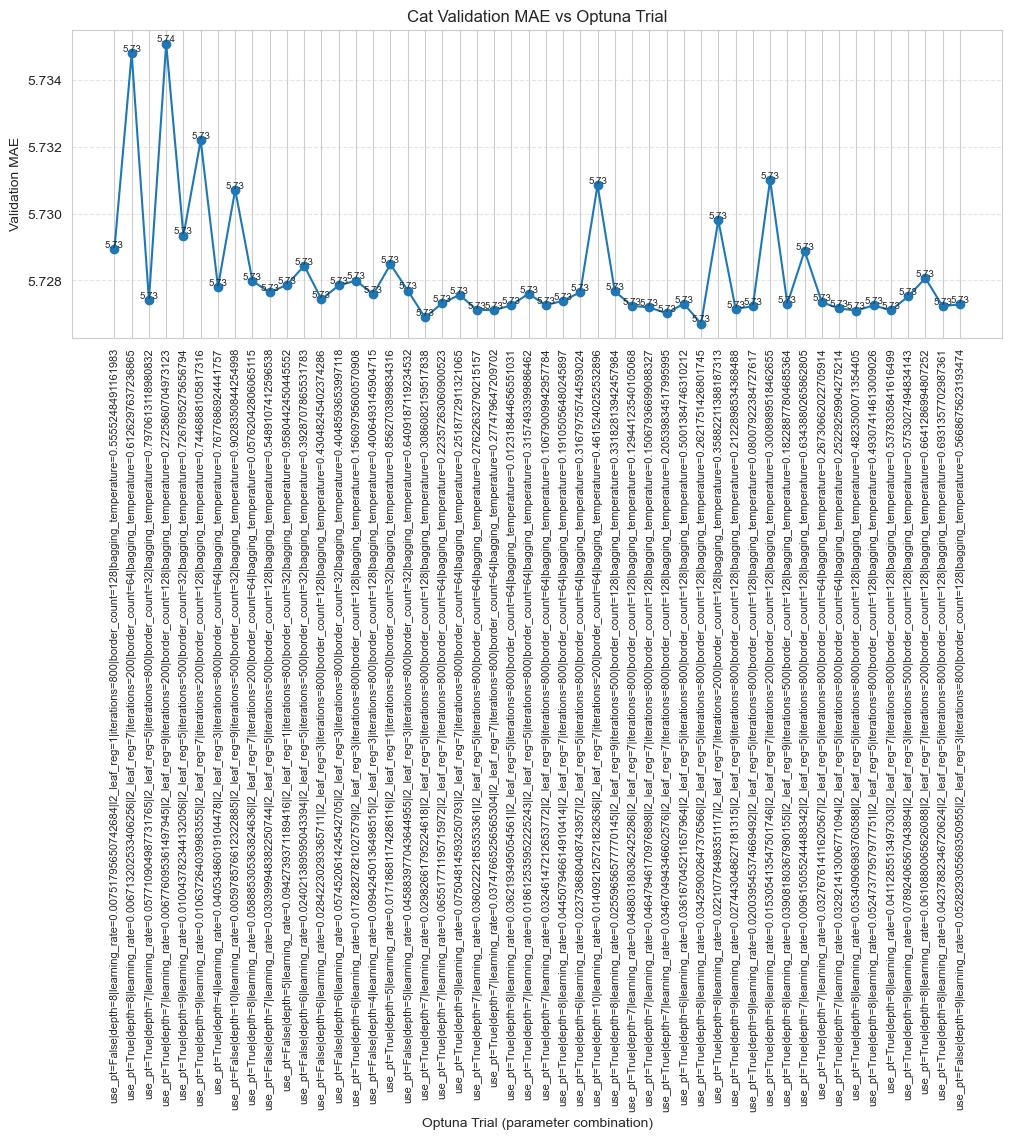

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/1552823583.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


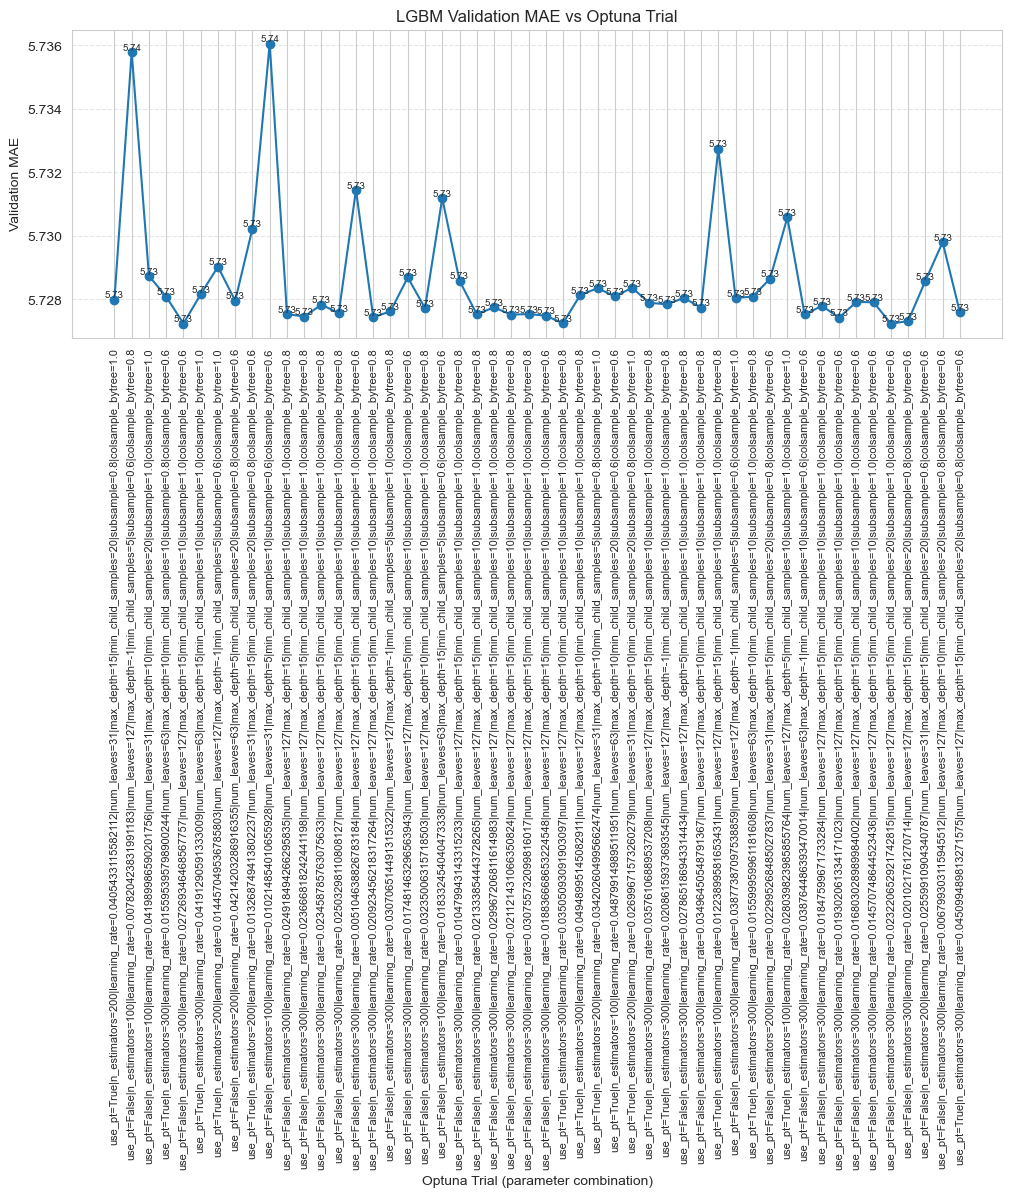

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/1552823583.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


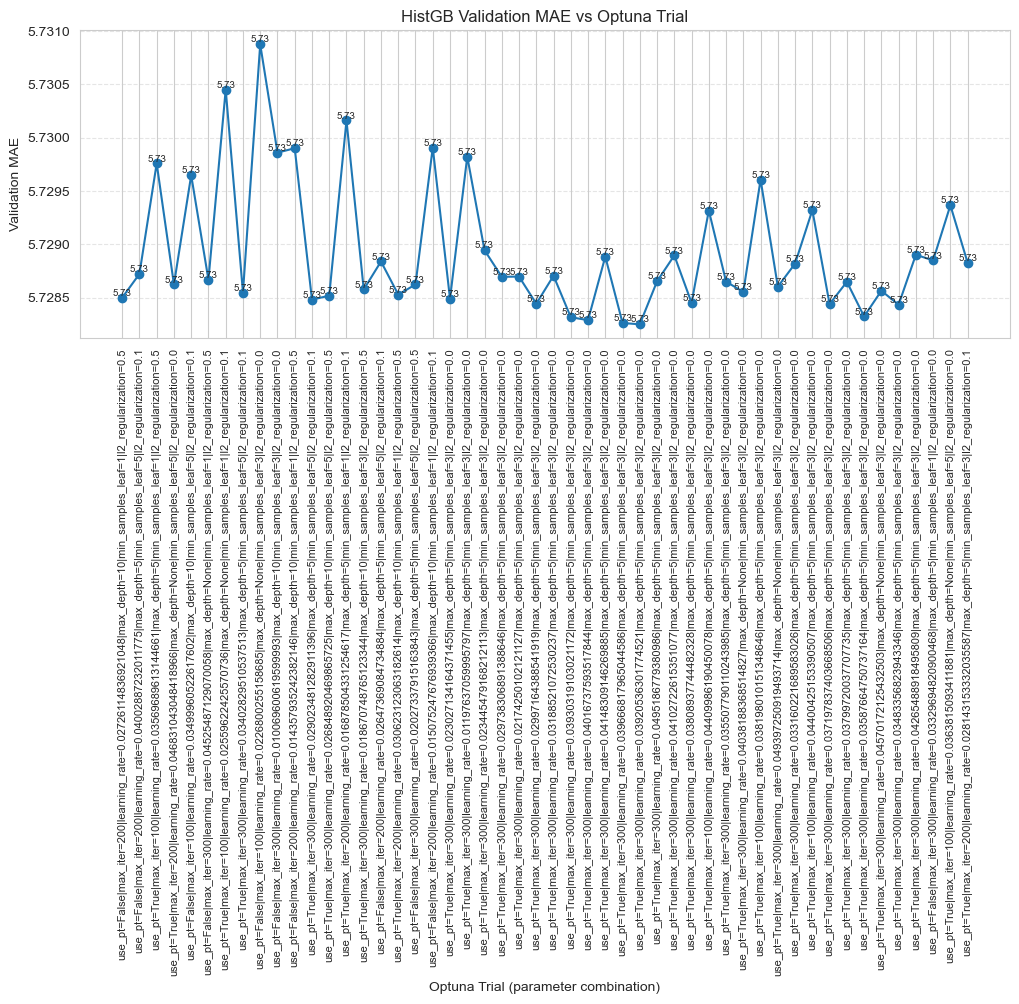

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_94106/1552823583.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


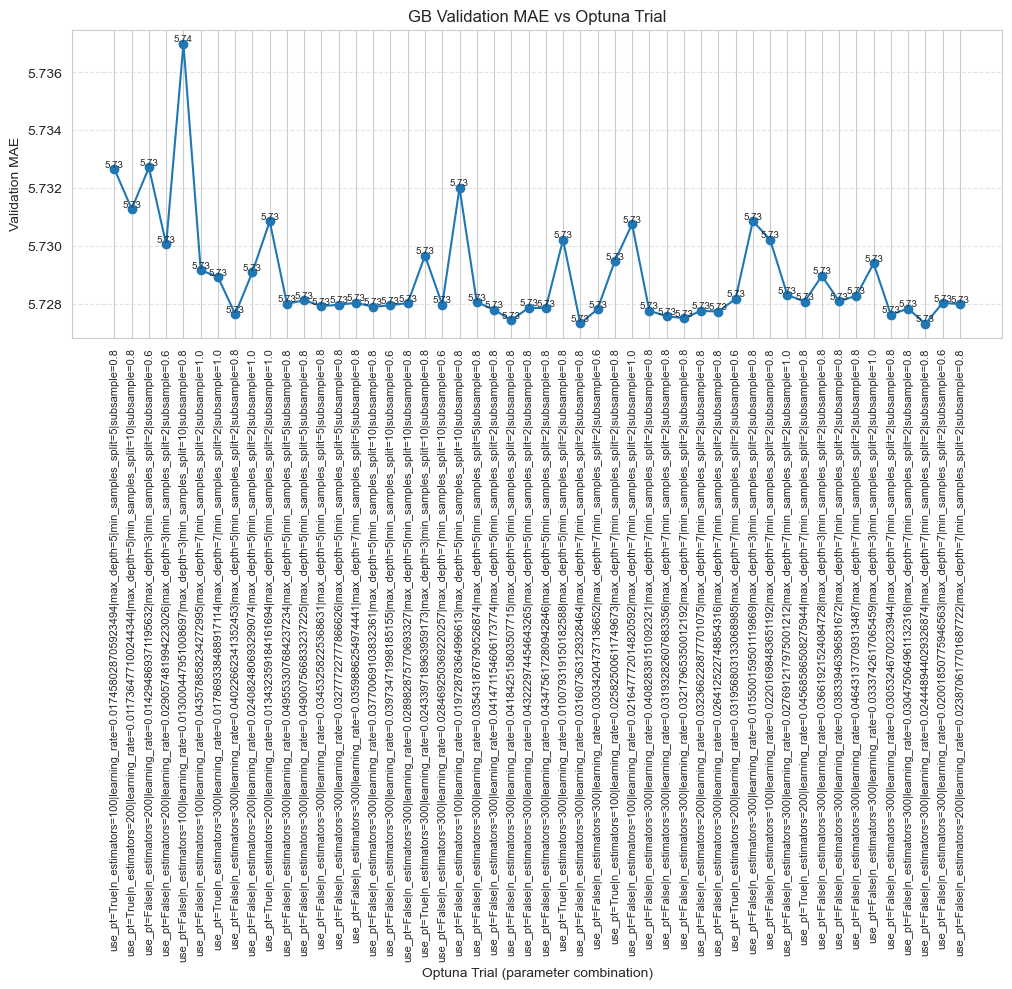

In [61]:
# 하이퍼파라미터 튜닝 시각화

for name, study in studies.items():
    # 1) trials 정보 추출
    records = []
    for t in study.trials:
        # trial.params 는 dict, trial.value 는 validation MAE
        combo = "|".join(f"{k}={v}" for k, v in t.params.items())
        records.append({
            "trial": t.number,
            "validation_MAE": t.value,
            "combo": combo
        })
    df_trials = pd.DataFrame(records)

    # 2) 시각화
    plt.figure(figsize=(12, 4))
    plt.plot(df_trials["trial"], df_trials["validation_MAE"], marker="o", linestyle="-")
    plt.xticks(df_trials["trial"], df_trials["combo"], rotation=90, fontsize=8)
    plt.title(f"{name} Validation MAE vs Optuna Trial")
    plt.xlabel("Optuna Trial (parameter combination)")
    plt.ylabel("Validation MAE")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    for _, row in df_trials.iterrows():
        plt.text(row["trial"], row["validation_MAE"], f"{row['validation_MAE']:.2f}",
                 ha="center", va="bottom", fontsize=7)
    plt.tight_layout()
    plt.show()

In [62]:
best_estimators

{'Cat': Pipeline(steps=[('pt', PowerTransformer()),
                 ('model',
                  <catboost.core.CatBoostRegressor object at 0x151b79e50>)]),
 'LGBM': Pipeline(steps=[('model',
                  LGBMRegressor(colsample_bytree=0.6,
                                learning_rate=0.023220652921742815, max_depth=15,
                                n_estimators=300, num_leaves=127,
                                random_state=42))]),
 'HistGB': Pipeline(steps=[('pt', PowerTransformer()),
                 ('model',
                  HistGradientBoostingRegressor(learning_rate=0.03920536301774521,
                                                max_depth=5, max_iter=300,
                                                min_samples_leaf=3,
                                                random_state=42))]),
 'GB': Pipeline(steps=[('model',
                  GradientBoostingRegressor(learning_rate=0.024448944029326874,
                                            max_depth=7, n_esti

In [63]:
cat_params = best_estimators['Cat'].get_params()
print(cat_params)

{'memory': None, 'steps': [('pt', PowerTransformer()), ('model', <catboost.core.CatBoostRegressor object at 0x151b79e50>)], 'transform_input': None, 'verbose': False, 'pt': PowerTransformer(), 'model': <catboost.core.CatBoostRegressor object at 0x151b79e50>, 'pt__copy': True, 'pt__method': 'yeo-johnson', 'pt__standardize': True, 'model__iterations': 800, 'model__learning_rate': 0.034259002647376566, 'model__depth': 8, 'model__l2_leaf_reg': 5, 'model__loss_function': 'RMSE', 'model__border_count': 128, 'model__verbose': False, 'model__bagging_temperature': 0.2621751426801745, 'model__random_state': 42}


In [64]:
df_test

,test_MAE,test_MSE
model,,
Cat,2308.387197,1.484240e+08
LGBM,2308.897316,1.483503e+08
GB,2315.698358,1.483765e+08
HistGB,2315.886104,1.485069e+08


In [65]:
# 1) 테스트 MAE 최저 모델 이름
best_model_name = df_test['test_MAE'].idxmin()
best_model = best_estimators[best_model_name]

# 2) Validation MAE (Optuna) 와 Test MAE/MSE (df_test) 가져오기
validation_mae = studies[best_model_name].best_value
test_mae       = df_test.loc[best_model_name, 'test_MAE']
test_mse       = df_test.loc[best_model_name, 'test_MSE']

# 3) 튜닝된 파라미터
tuned_params = studies[best_model_name].best_params

print(f"최종 선택 모델       : {best_model_name}")
print(f"튜닝된 하이퍼파라미터 : {tuned_params}")
print(f"Validation MAE       : {validation_mae:.2f}")
print(f"Test MAE             : {test_mae:.2f}")
print(f"Test MSE             : {test_mse:.4e}")

최종 선택 모델       : Cat
튜닝된 하이퍼파라미터 : {'use_pt': True, 'depth': 8, 'learning_rate': 0.034259002647376566, 'l2_leaf_reg': 5, 'iterations': 800, 'border_count': 128, 'bagging_temperature': 0.2621751426801745}
Validation MAE       : 5.73
Test MAE             : 2308.39
Test MSE             : 1.4842e+08


In [66]:
from itertools import combinations
from sklearn.ensemble import (
    StackingRegressor, VotingRegressor
)

# 1) Optuna 최적 파라미터 + use_pt 로 Pipeline 만들기
pipelines = {}
for name, study in studies.items():
    # 1.1 best_params 복사 & use_pt 분리
    best = study.best_params.copy()
    use_pt = best.pop('use_pt')
    # 1.2 모델 인스턴스 생성
    if name == 'Cat':
        mdl = CatBoostRegressor(**best, random_state=42, verbose=False)
    elif name == 'LGBM':
        mdl = LGBMRegressor(**best, random_state=42)
    elif name == 'HistGB':
        mdl = HistGradientBoostingRegressor(**best, random_state=42)
    else:
        mdl = GradientBoostingRegressor(**best, random_state=42)
    # 1.3 PT 여부에 따라 Pipeline 구성
    steps = []
    if use_pt:
        steps.append(('pt', PowerTransformer(method='yeo-johnson')))
    steps.append(('model', mdl))
    pipe = Pipeline(steps)
    # 1.4 TV(Train+Valid) 전체 데이터로 재학습
    pipe.fit(X_tv_proc, y_tv_proc)
    pipelines[name] = pipe

# 2) 앙상블: Stacking & Voting
ensemble_results = []
base_items = list(pipelines.items())
meta_models = {'Ridge': Ridge(), 'Lasso': Lasso()}

# 2.1 Stacking (2개,3개 조합)
for r in [2, 3]:
    for combo in tqdm(combinations(base_items, r), desc=f"Stacking r={r}", leave=False):
        names, pipes = zip(*combo)
        for meta_name, meta in meta_models.items():
            stack = StackingRegressor(
                estimators=list(zip(names, pipes)),
                final_estimator=meta,
                n_jobs=-1
            )
            stack.fit(X_tv_proc, y_tv_proc)
            y_pred = np.expm1(stack.predict(X_test_proc))
            ensemble_results.append({
                'type': f"Stack({'+'.join(names)})/{meta_name}",
                'MAE':  mean_absolute_error(y_test, y_pred)
            })

# 2.2 Voting (2개,3개 조합)
for r in [2, 3]:
    for combo in tqdm(combinations(base_items, r), desc=f"Voting r={r}", leave=False):
        names, pipes = zip(*combo)
        vote = VotingRegressor(estimators=list(zip(names, pipes)), n_jobs=-1)
        vote.fit(X_tv_proc, y_tv_proc)
        y_pred = np.expm1(vote.predict(X_test_proc))
        ensemble_results.append({
            'type': f"Vote({'+'.join(names)})",
            'MAE':  mean_absolute_error(y_test, y_pred)
        })

# 3) 결과 정리 및 출력
df_ens = pd.DataFrame(ensemble_results).sort_values('MAE').reset_index(drop=True)
pd.set_option('display.max_rows', None)
print("\n=== Ensemble Results ===")
print(df_ens.to_string(index=False))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042


Stacking r=2: 0it [00:00, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

Stacking r=2: 3it [08:09, 195.52s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

Stacking r=2: 4it [09:34, 152.18s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

Stacking r=3: 0it [00:00, ?it/s]     

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006753 seconds.
You can se

Stacking r=3: 1it [01:49, 109.53s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

Stacking r=3: 3it [14:00, 307.34s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

Voting r=2: 0it [00:00, ?it/s]       

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042


Voting r=2: 3it [01:45, 46.72s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042


Voting r=2: 4it [01:49, 29.51s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042


Voting r=3: 0it [00:00, ?it/s]    

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042


Voting r=3: 1it [00:04,  4.72s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042


Voting r=3: 3it [03:17, 75.99s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8478
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 59
[LightGBM] [Info] Start training from score 7.440042



=== Ensemble Results ===
                        type         MAE
       Stack(Cat+LGBM)/Ridge 2305.697632
Stack(Cat+LGBM+HistGB)/Ridge 2305.767214
              Vote(Cat+LGBM) 2305.977267
    Stack(Cat+LGBM+GB)/Ridge 2306.286649
       Vote(Cat+LGBM+HistGB) 2307.202890
           Vote(Cat+LGBM+GB) 2307.594146
     Stack(Cat+HistGB)/Ridge 2307.747191
    Stack(LGBM+HistGB)/Ridge 2307.978717
         Stack(Cat+GB)/Ridge 2308.182387
  Stack(Cat+HistGB+GB)/Ridge 2308.568369
            Vote(Cat+HistGB) 2308.940135
        Stack(LGBM+GB)/Ridge 2308.963528
 Stack(LGBM+HistGB+GB)/Ridge 2308.974450
                Vote(Cat+GB) 2309.275313
           Vote(LGBM+HistGB) 2309.488125
         Vote(Cat+HistGB+GB) 2309.565614
               Vote(LGBM+GB) 2310.053779
        Vote(LGBM+HistGB+GB) 2310.226513
             Vote(HistGB+GB) 2313.457672
      Stack(HistGB+GB)/Ridge 2313.517530
       Stack(Cat+LGBM)/Lasso 2450.819718
  Stack(Cat+HistGB+GB)/Lasso 2450.819718
     Stack(Cat+HistGB)/Lasso 24

In [71]:
best_ens = df_ens.iloc[0]
print(f"최종 앙상블: {best_ens['type']}  (Test MAE: {best_ens['MAE']:.4f})")

최종 앙상블: Stack(Cat+LGBM)/Ridge  (Test MAE: 2305.6976)
